In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [6]:
#!unzip '/content/drive/MyDrive/Machine hack/Dataset (1).zip'
#train = pd.read_excel('/kaggle/input/mh-crime-rate-pr/Dataset/Train.xlsx')
test = pd.read_csv('/kaggle/input/mh-crime-rate-pr/Dataset/Test.csv')
ss  = pd.read_csv('/kaggle/input/mh-crime-rate-pr/Dataset/Submission.csv')

In [8]:
train = pd.read_excel('/kaggle/input/mh-crime-rate-pr/Dataset/Train.xlsx')

In [10]:
train.to_csv('train_c.csv',index=False)

In [7]:
ss.head()

Incident_Counts
0                0
1                0
2                0
3                0
4                0

In [4]:
train.head()

TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY       Date  
0  49.269802 -123.083763  16.0    15.0  1999      5   12 1999-05-12  
1  49.269802 -123.083763  15.0    20.0  1999      5    7 1999-05-07  
2  49.269802 -123.083763  16.0    40.0  1999      4   23 1999-04-23  
3  49.269802 -123.083763  11.0    15.0  1999      4   20 1999-04-20  
4  49.269802 -123.083763  17.0    45.0  1999      4   12 1999-04-12

In [5]:
test.head()

YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1  2013      6                                   Theft of Vehicle   
2  2013      6                                   Theft of Bicycle   
3  2013      6                                 Theft from Vehicle   
4  2013      6                                        Other Theft   

   Incident_Counts  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [8]:
test.nunique()

YEAR                2
MONTH              12
TYPE                9
Incident_Counts     0
dtype: int64

In [6]:
test[test.YEAR==2013]

YEAR  MONTH                                               TYPE  \
0   2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1   2013      6                                   Theft of Vehicle   
2   2013      6                                   Theft of Bicycle   
3   2013      6                                 Theft from Vehicle   
4   2013      6                                        Other Theft   
5   2013      6                           Offence Against a Person   
6   2013      6                                           Mischief   
7   2013      6                  Break and Enter Residential/Other   
8   2013      6                         Break and Enter Commercial   
9   2013      5  Vehicle Collision or Pedestrian Struck (with I...   
10  2013      5                                   Theft of Vehicle   
11  2013      5                                   Theft of Bicycle   
12  2013      5                                 Theft from Vehicle   
13  2013      5                                        Other Theft   
14  2013      5                           Offence Against a Person   
15  2013      5                                           Mischief   
16  2013      5                  Break and Enter Residential/Other   
17  2013      5                         Break and Enter Commercial   
18  2013      4  Vehicle Collision or Pedestrian Struck (with I...   
19  2013      4                                   Theft of Vehicle   
20  2013      4                                   Theft of Bicycle   
21  2013      4                                 Theft from Vehicle   
22  2013      4                                        Other Theft   
23  2013      4                           Offence Against a Person   
24  2013      4                                           Mischief   
25  2013      4                  Break and Enter Residential/Other   
26  2013      4                         Break and Enter Commercial   
27  2013      3  Vehicle Collision or Pedestrian Struck (with I...   
28  2013      3                                   Theft of Vehicle   
29  2013      3                                   Theft of Bicycle   
30  2013      3                                 Theft from Vehicle   
31  2013      3                                        Other Theft   
32  2013      3                           Offence Against a Person   
33  2013      3                                           Mischief   
34  2013      3                  Break and Enter Residential/Other   
35  2013      3                         Break and Enter Commercial   
36  2013      2  Vehicle Collision or Pedestrian Struck (with I...   
37  2013      2                                   Theft of Vehicle   
38  2013      2                                   Theft of Bicycle   
39  2013      2                                 Theft from Vehicle   
40  2013      2                                        Other Theft   
41  2013      2                           Offence Against a Person   
42  2013      2                                           Mischief   
43  2013      2                  Break and Enter Residential/Other   
44  2013      2                         Break and Enter Commercial   
45  2013      1  Vehicle Collision or Pedestrian Struck (with I...   
46  2013      1                                   Theft of Vehicle   
47  2013      1                                   Theft of Bicycle   
48  2013      1                                 Theft from Vehicle   
49  2013      1                                        Other Theft   
50  2013      1                           Offence Against a Person   
51  2013      1                                           Mischief   
52  2013      1                  Break and Enter Residential/Other   
53  2013      1                         Break and Enter Commercial   

    Incident_Counts  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
5               NaN  

In [ ]:
# we need to predict count of crime in each section
#for that we need to aggregate our training set
#understand each feature
#make ure model ready for training

In [7]:
train.nunique()

TYPE                 9
HUNDRED_BLOCK    20566
NEIGHBOURHOOD       24
X                84225
Y                82768
Latitude         89488
Longitude        87190
HOUR                24
MINUTE              60
YEAR                13
MONTH               12
DAY                 31
Date              4748
dtype: int64

In [ ]:
#we have 13 unique years and 12 months data

In [ ]:
#lets simply make a forecasting model without considereing any other features
#only year and month take into considereation

In [11]:
train_grp = train.groupby(['TYPE', 'YEAR', 'MONTH']).size().reset_index(name='count')
train_grp

TYPE  YEAR  MONTH  count
0                            Break and Enter Commercial  1999      1    303
1                            Break and Enter Commercial  1999      2    254
2                            Break and Enter Commercial  1999      3    292
3                            Break and Enter Commercial  1999      4    266
4                            Break and Enter Commercial  1999      5    291
...                                                 ...   ...    ...    ...
1399  Vehicle Collision or Pedestrian Struck (with I...  2011      8    148
1400  Vehicle Collision or Pedestrian Struck (with I...  2011      9    142
1401  Vehicle Collision or Pedestrian Struck (with I...  2011     10    134
1402  Vehicle Collision or Pedestrian Struck (with I...  2011     11    158
1403  Vehicle Collision or Pedestrian Struck (with I...  2011     12    127

[1404 rows x 4 columns]

In [16]:
grouped = train_grp.groupby('TYPE')
grouped

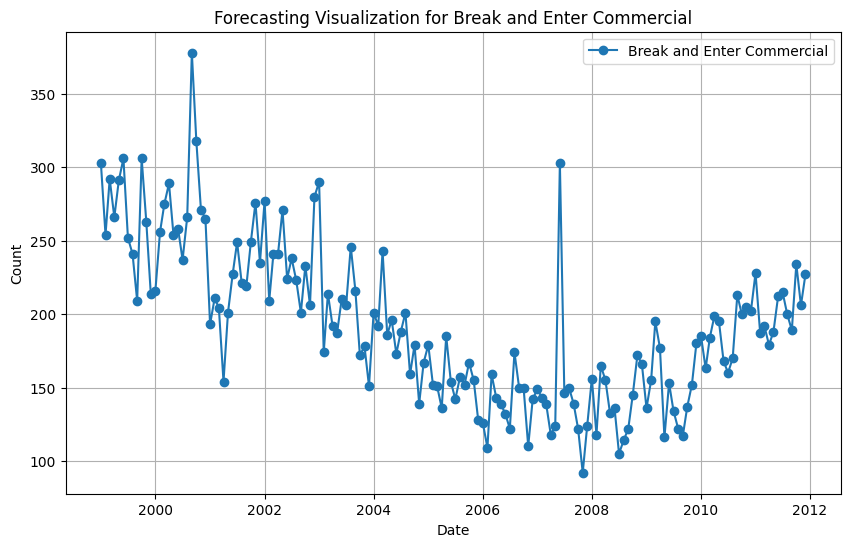

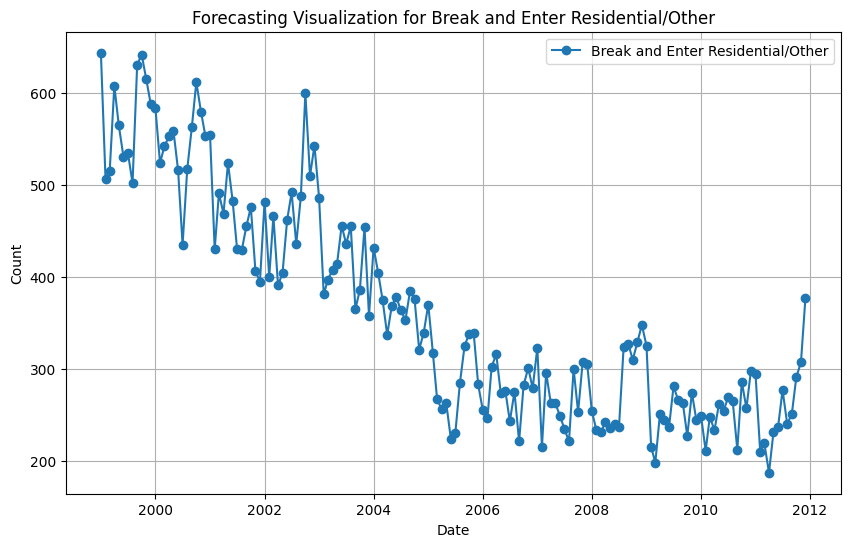

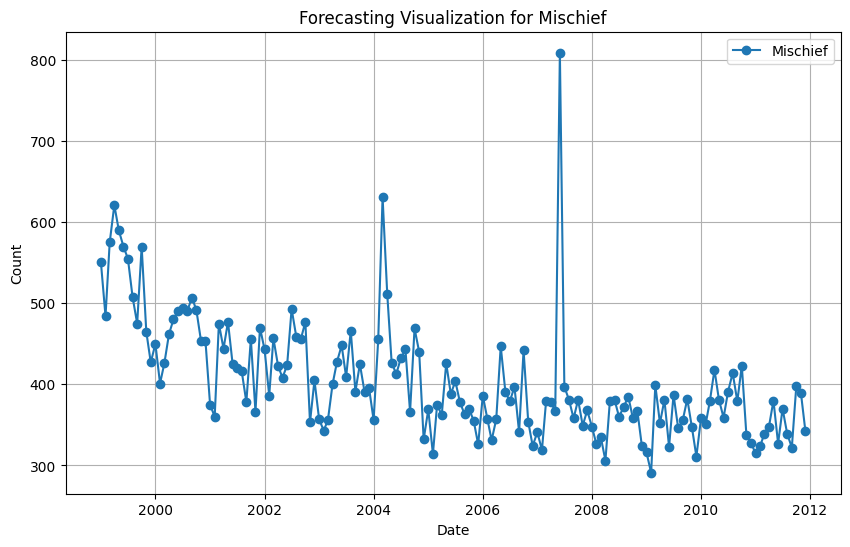

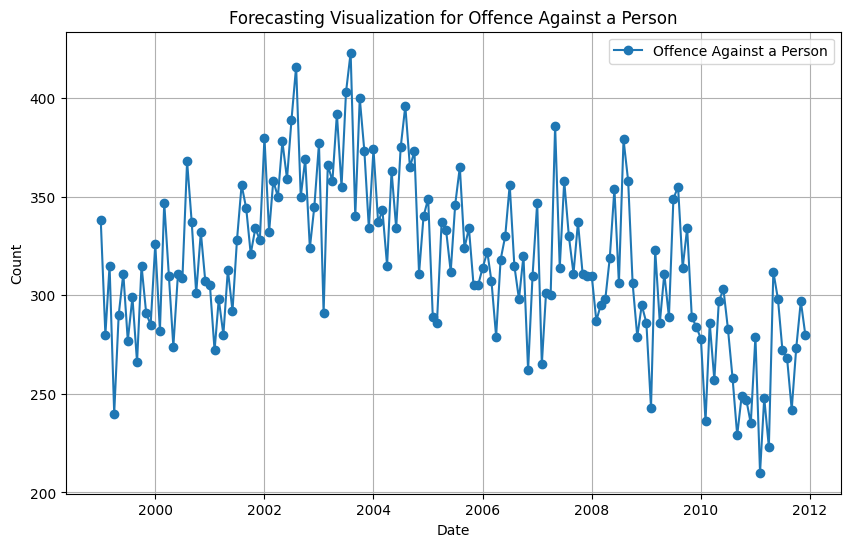

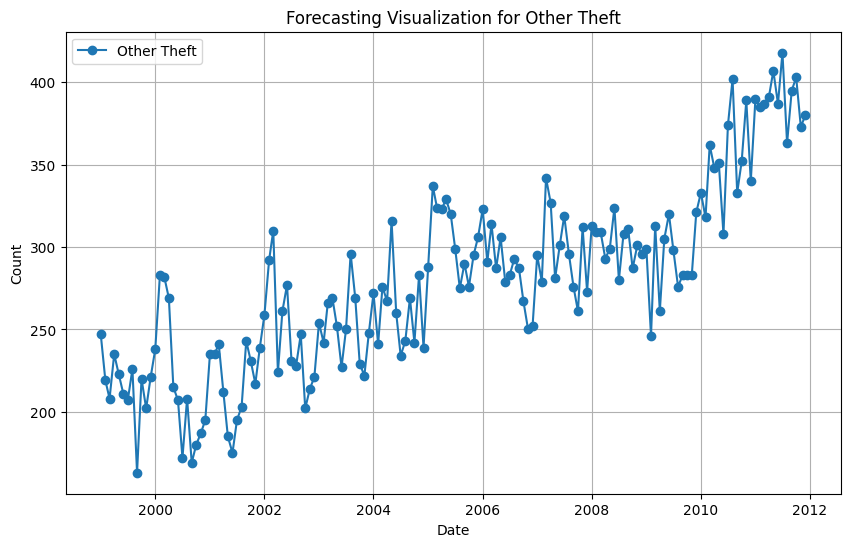

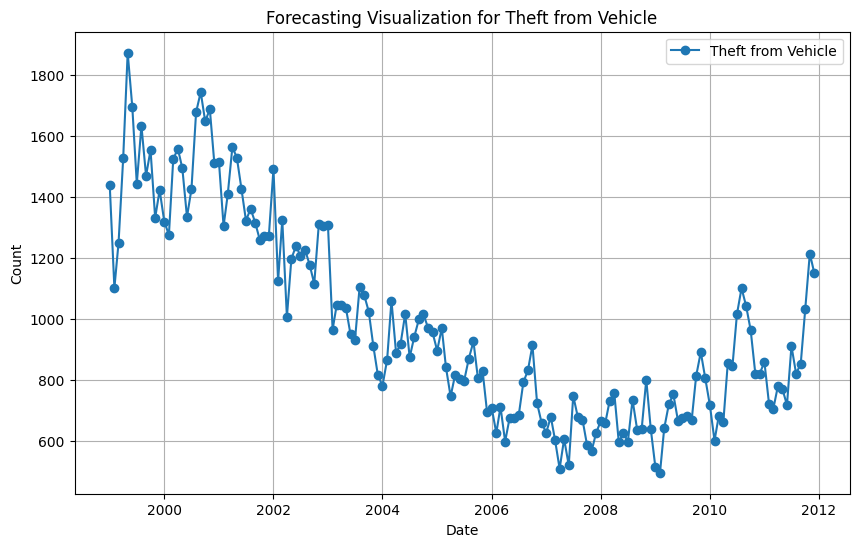

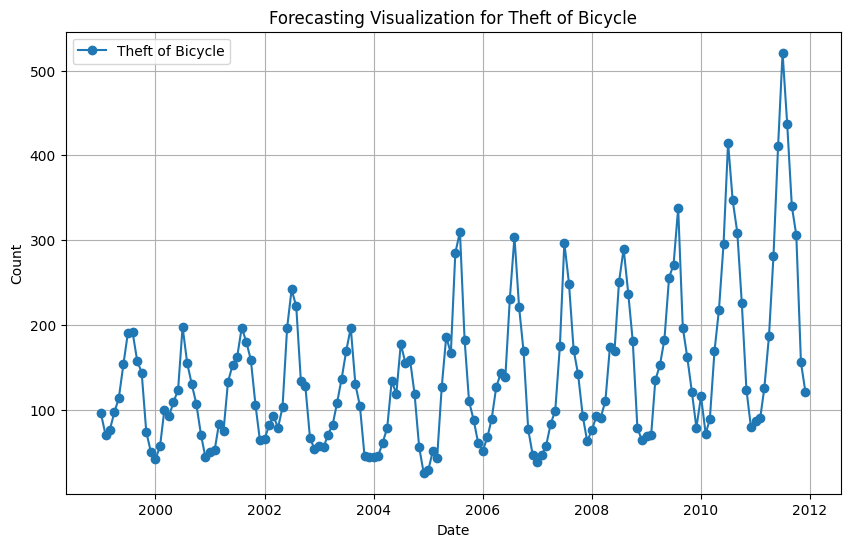

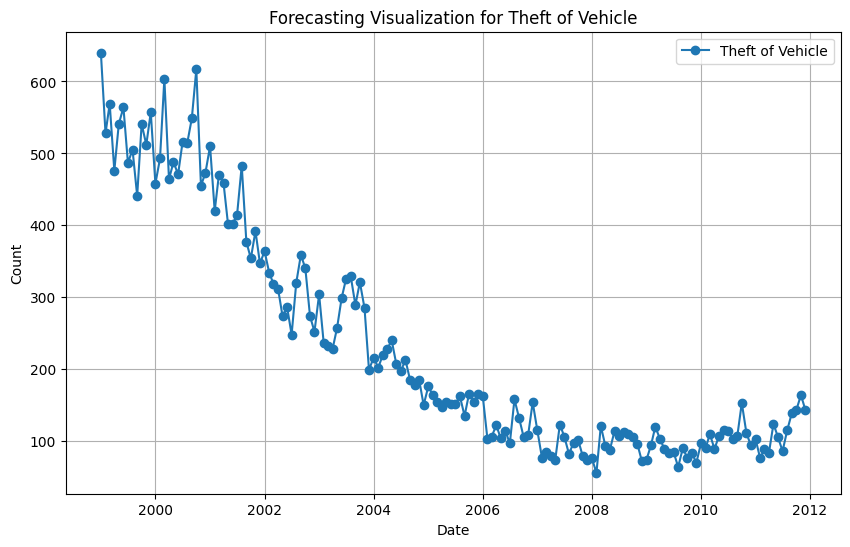

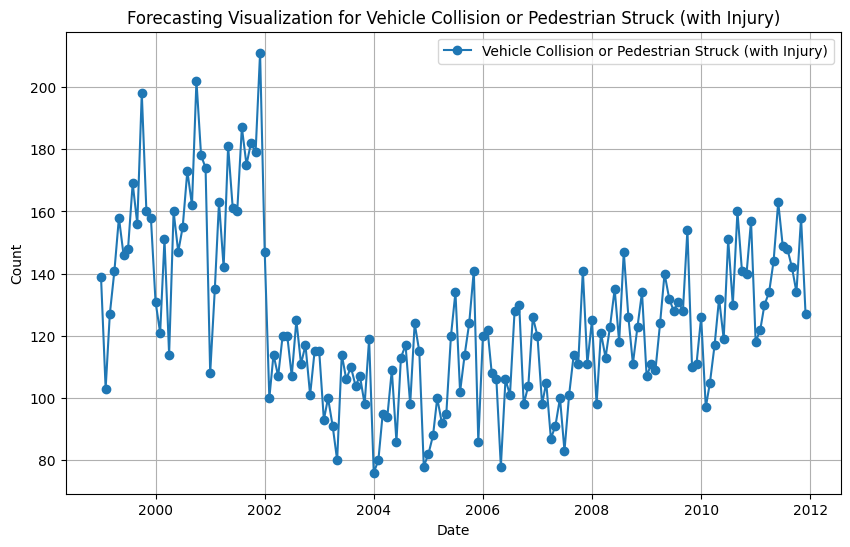

In [23]:
df = train_grp.copy()

# Combine YEAR and MONTH into a single datetime column for better plotting
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))


# Plot each type separately
for name in df.TYPE.unique():
    tr = df[df.TYPE==name]
    plt.figure(figsize=(10, 6))
    plt.plot(tr['DATE'], tr['count'], marker='o', linestyle='-', label=name)
    plt.title(f'Forecasting Visualization for {name}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.grid(True)
    plt.legend()
    plt.show()

In [14]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00:00:010:01


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [12]:
train_grp = train.groupby(['TYPE', 'YEAR', 'MONTH']).size().reset_index(name='count')
train_grp

TYPE  YEAR  MONTH  count
0                            Break and Enter Commercial  1999      1    303
1                            Break and Enter Commercial  1999      2    254
2                            Break and Enter Commercial  1999      3    292
3                            Break and Enter Commercial  1999      4    266
4                            Break and Enter Commercial  1999      5    291
...                                                 ...   ...    ...    ...
1399  Vehicle Collision or Pedestrian Struck (with I...  2011      8    148
1400  Vehicle Collision or Pedestrian Struck (with I...  2011      9    142
1401  Vehicle Collision or Pedestrian Struck (with I...  2011     10    134
1402  Vehicle Collision or Pedestrian Struck (with I...  2011     11    158
1403  Vehicle Collision or Pedestrian Struck (with I...  2011     12    127

[1404 rows x 4 columns]

                         TYPE  YEAR  MONTH  count       DATE
0  Break and Enter Commercial  1999      1    303 1999-01-01
1  Break and Enter Commercial  1999      2    254 1999-02-01
2  Break and Enter Commercial  1999      3    292 1999-03-01
3  Break and Enter Commercial  1999      4    266 1999-04-01
4  Break and Enter Commercial  1999      5    291 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0942
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0214
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173 
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0136
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140 
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0119
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117
Epoch 13/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126
Epoch 14/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146
Epoch 15/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/tmp/ipykernel_36/3510780382.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


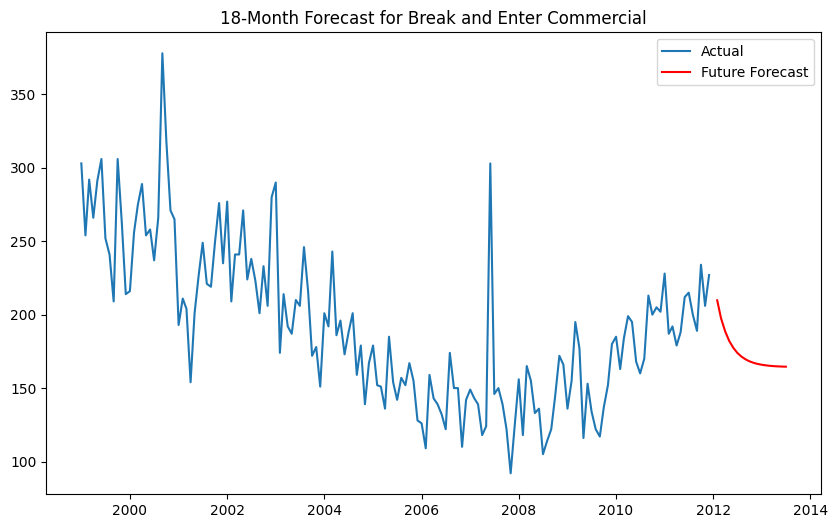

                                TYPE  YEAR  MONTH  count       DATE
0  Break and Enter Residential/Other  1999      1    644 1999-01-01
1  Break and Enter Residential/Other  1999      2    507 1999-02-01
2  Break and Enter Residential/Other  1999      3    515 1999-03-01
3  Break and Enter Residential/Other  1999      4    608 1999-04-01
4  Break and Enter Residential/Other  1999      5    565 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1104
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0277
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0193
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101
Epoch 13/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096 
Epoch 14/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115 
Epoch 15/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/tmp/ipykernel_36/3510780382.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


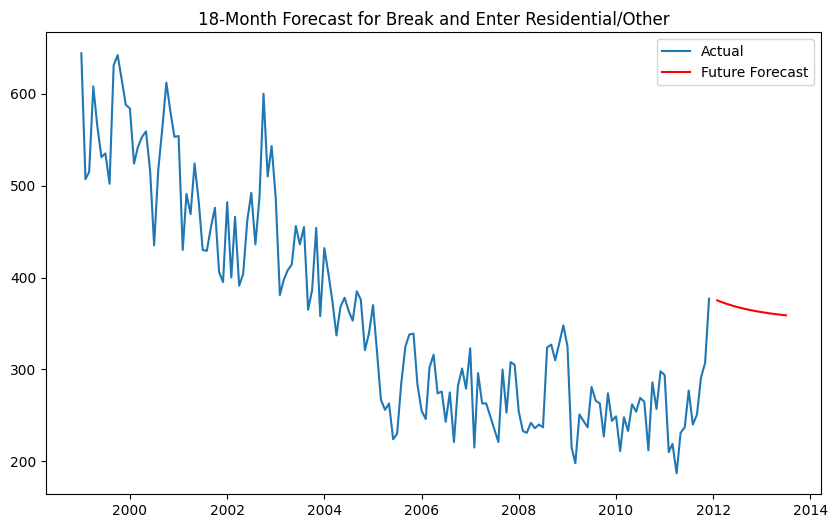

       TYPE  YEAR  MONTH  count       DATE
0  Mischief  1999      1    551 1999-01-01
1  Mischief  1999      2    484 1999-02-01
2  Mischief  1999      3    575 1999-03-01
3  Mischief  1999      4    621 1999-04-01
4  Mischief  1999      5    590 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0414
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150 
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0283
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102 
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182 
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0217
Epoch 13/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101
Epoch 14/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108
Epoch 15/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

/tmp/ipykernel_36/3510780382.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


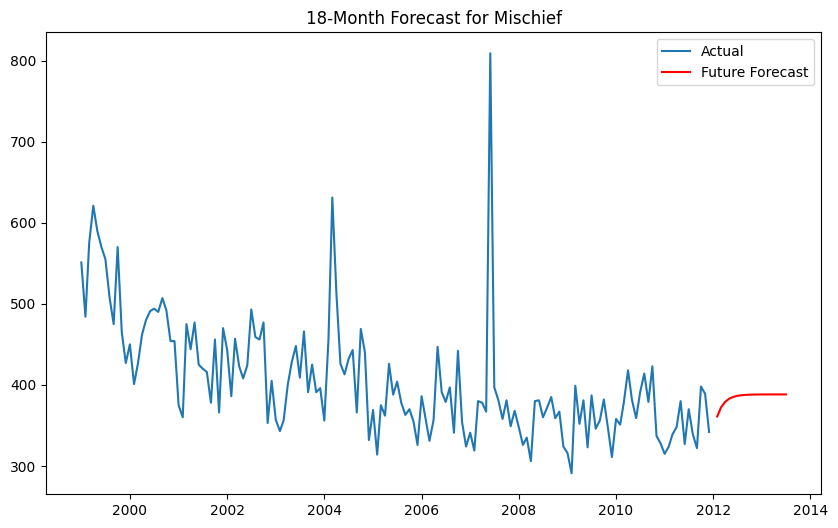

                       TYPE  YEAR  MONTH  count       DATE
0  Offence Against a Person  1999      1    338 1999-01-01
1  Offence Against a Person  1999      2    280 1999-02-01
2  Offence Against a Person  1999      3    315 1999-03-01
3  Offence Against a Person  1999      4    240 1999-04-01
4  Offence Against a Person  1999      5    290 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1956
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0299
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260 
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0224
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0245
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0280
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0240 
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0292
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0244
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0279
Epoch 13/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0246
Epoch 14/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0290
Epoch 15/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/tmp/ipykernel_36/3510780382.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


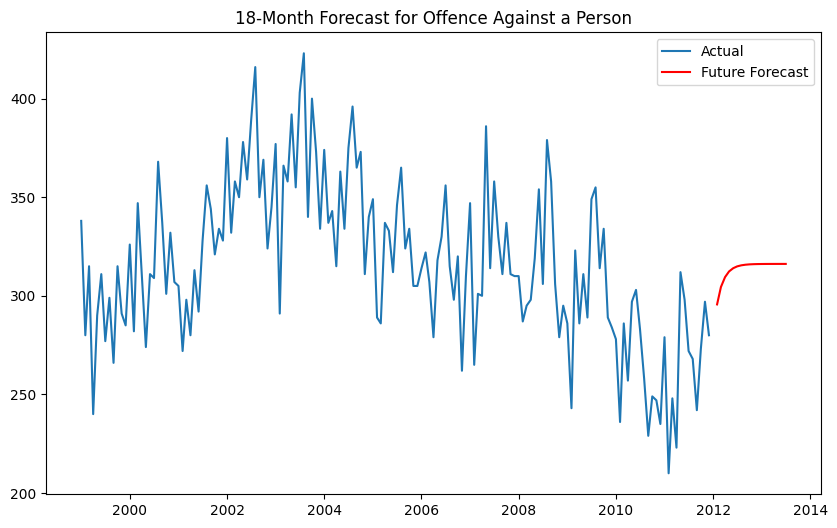

          TYPE  YEAR  MONTH  count       DATE
0  Other Theft  1999      1    247 1999-01-01
1  Other Theft  1999      2    219 1999-02-01
2  Other Theft  1999      3    208 1999-03-01
3  Other Theft  1999      4    235 1999-04-01
4  Other Theft  1999      5    223 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1264
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0208
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144 
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0157
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134
Epoch 13/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131
Epoch 14/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150
Epoch 15/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/tmp/ipykernel_36/3510780382.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


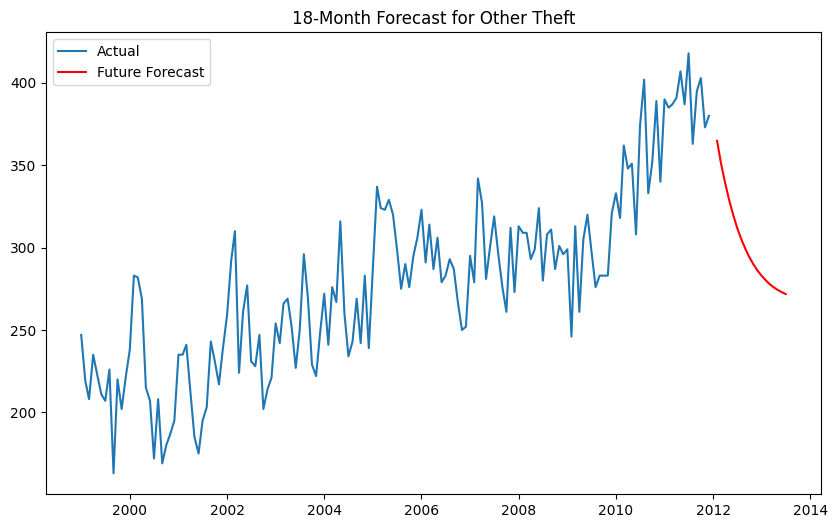

                 TYPE  YEAR  MONTH  count       DATE
0  Theft from Vehicle  1999      1   1438 1999-01-01
1  Theft from Vehicle  1999      2   1102 1999-02-01
2  Theft from Vehicle  1999      3   1251 1999-03-01
3  Theft from Vehicle  1999      4   1528 1999-04-01
4  Theft from Vehicle  1999      5   1873 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0880
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165 
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0111
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083 
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 13/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109
Epoch 14/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086
Epoch 15/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/tmp/ipykernel_36/3510780382.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


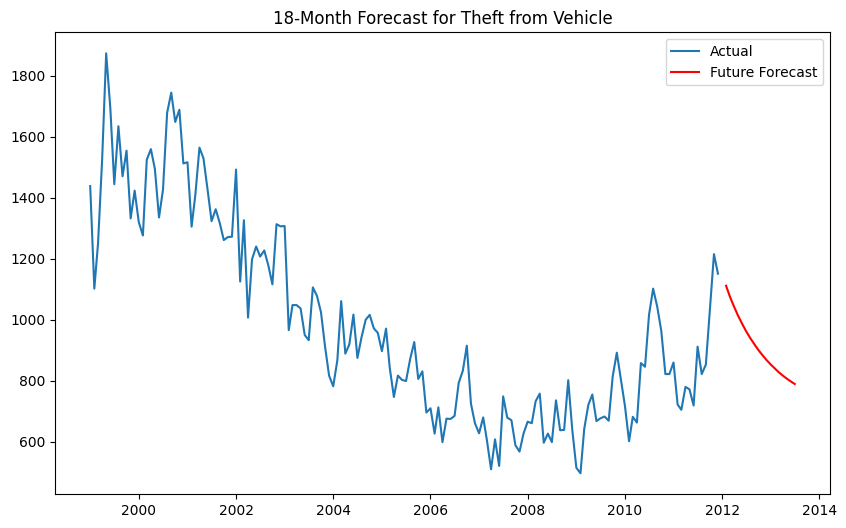

               TYPE  YEAR  MONTH  count       DATE
0  Theft of Bicycle  1999      1     96 1999-01-01
1  Theft of Bicycle  1999      2     71 1999-02-01
2  Theft of Bicycle  1999      3     76 1999-03-01
3  Theft of Bicycle  1999      4     97 1999-04-01
4  Theft of Bicycle  1999      5    114 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0866
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0252
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121 
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0132
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088
Epoch 13/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101
Epoch 14/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106
Epoch 15/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/tmp/ipykernel_36/3510780382.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


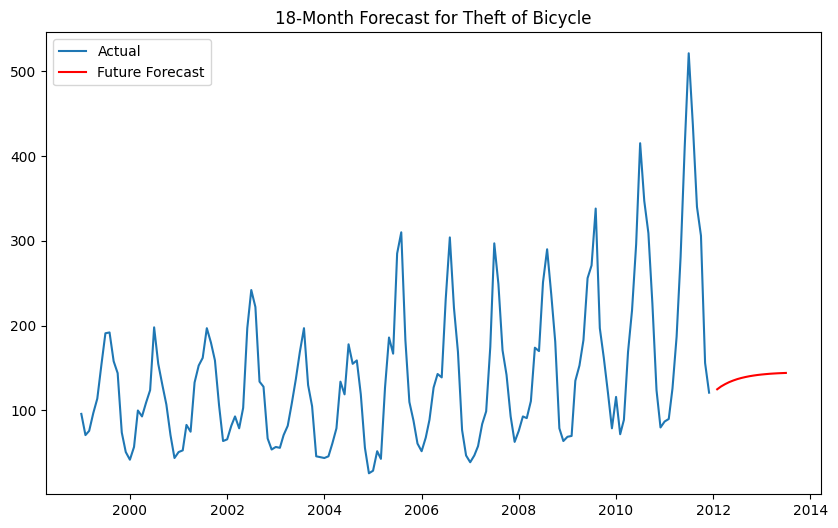

               TYPE  YEAR  MONTH  count       DATE
0  Theft of Vehicle  1999      1    640 1999-01-01
1  Theft of Vehicle  1999      2    528 1999-02-01
2  Theft of Vehicle  1999      3    569 1999-03-01
3  Theft of Vehicle  1999      4    476 1999-04-01
4  Theft of Vehicle  1999      5    541 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1007
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0278
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059 
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057 
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 13/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047
Epoch 14/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045
Epoch 15/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/tmp/ipykernel_36/3510780382.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


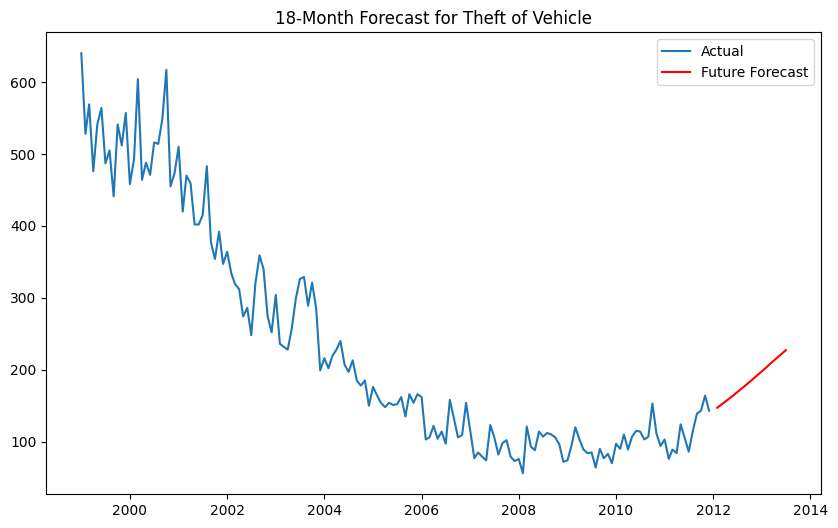

                                                TYPE  YEAR  MONTH  count  \
0  Vehicle Collision or Pedestrian Struck (with I...  1999      1    139   
1  Vehicle Collision or Pedestrian Struck (with I...  1999      2    103   
2  Vehicle Collision or Pedestrian Struck (with I...  1999      3    127   
3  Vehicle Collision or Pedestrian Struck (with I...  1999      4    141   
4  Vehicle Collision or Pedestrian Struck (with I...  1999      5    158   

        DATE  
0 1999-01-01  
1 1999-02-01  
2 1999-03-01  
3 1999-04-01  
4 1999-05-01  
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1240
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0255
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0232
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0235
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0233
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0258
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0228
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0192
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0245
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0214
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0207 
Epoch 13/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0237
Epoch 14/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200
Epoch 15/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/tmp/ipykernel_36/3510780382.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


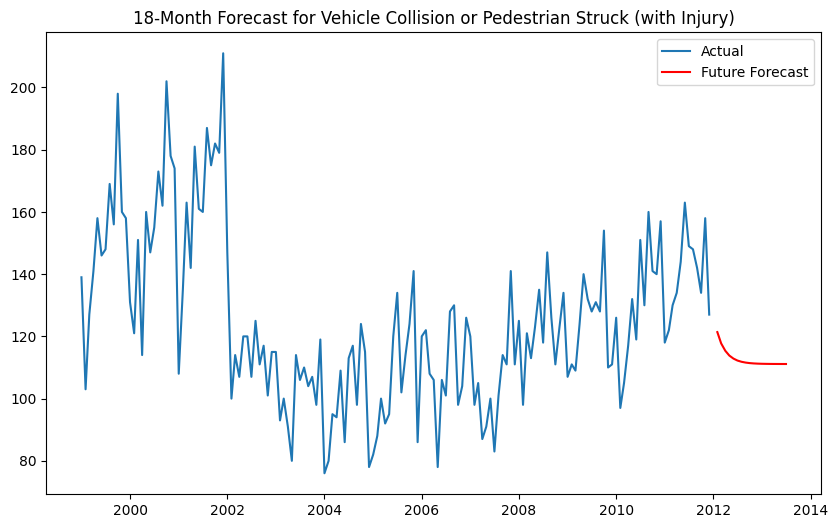

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
bb=[]
cc=[]
df = train_grp.copy()

# Combine YEAR and MONTH into a single datetime column for better plotting
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Function to create LSTM dataset
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Plot each type separately
for name in df.TYPE.unique():
    tr = df[df.TYPE == name]
    tr = tr.reset_index(drop=True)
    print(tr.head())

    # Use the full dataset for training
    full_data = tr['count'].values.reshape(-1, 1)

    # Scaling the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    full_scaled = scaler.fit_transform(full_data)

    # Create LSTM dataset with the full data
    time_step = 1  # You can adjust the number of time steps based on your data
    X_full, y_full = create_lstm_dataset(full_scaled, time_step)
    
    # Reshape input to be [samples, time steps, features] which is required for LSTM
    X_full = X_full.reshape(X_full.shape[0], X_full.shape[1], 1)

    # Build LSTM Model
    model = Sequential()
    model.add(LSTM(50, return_sequences=False, input_shape=(time_step, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model with the full dataset
    model.fit(X_full, y_full, epochs=100, batch_size=1, verbose=1)

    # Forecasting 18 months into the future
    future_steps = 18
    last_data = full_scaled[-time_step:]  # Start with the last time_step of the full data
    predictions = []

    for _ in range(future_steps):
        # Reshape data for LSTM input
        last_data_reshaped = last_data.reshape((1, time_step, 1))
        
        # Predict next step
        next_step = model.predict(last_data_reshaped, verbose=0)
        
        # Store prediction
        predictions.append(next_step[0, 0])
        
        # Update the data for the next prediction
        last_data = np.append(last_data, next_step)[-time_step:]
    
    # Inverse transform to get predictions back to original scale
    future_predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Create a date range for the future predictions
    future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')
    bb.append(future_predictions)
    cc.append(future_dates)
    # Plotting the actual time series and future predictions
    plt.figure(figsize=(10, 6))
    plt.plot(tr['DATE'], tr['count'], label='Actual')
    plt.plot(future_dates, future_predictions, label='Future Forecast', color='red')
    
    plt.legend(["Actual", "Future Forecast"])
    plt.title(f'18-Month Forecast for {name}')
    plt.show()


                         TYPE  YEAR  MONTH  count       DATE
0  Break and Enter Commercial  1999      1    303 1999-01-01
1  Break and Enter Commercial  1999      2    254 1999-02-01
2  Break and Enter Commercial  1999      3    292 1999-03-01
3  Break and Enter Commercial  1999      4    266 1999-04-01
4  Break and Enter Commercial  1999      5    291 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0846
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0277
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0226
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0175 
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0211
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0222
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0178
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199
Epoch 12/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0245
Epoch 13/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0157
Epoch 14/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138
Epoch 15/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/tmp/ipykernel_36/2546764884.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  val_range = pd.date_range(start=val_data['DATE'].iloc[0], periods=len(val_predict), freq='M')


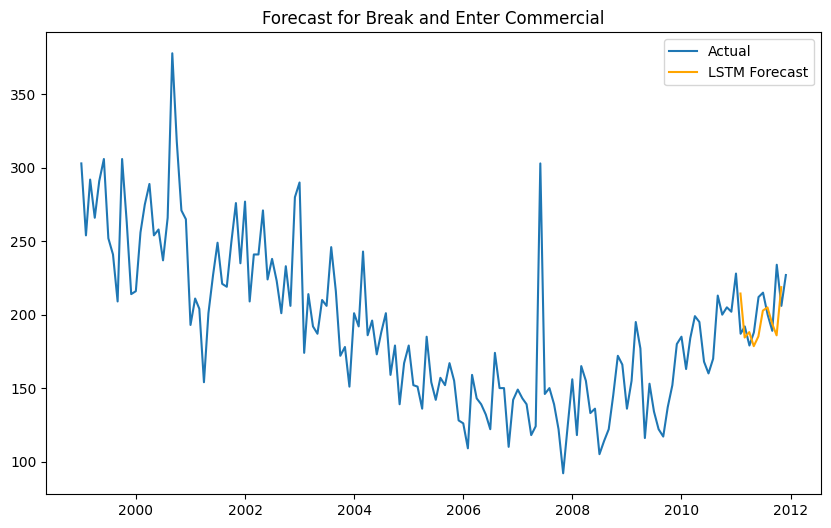

                                TYPE  YEAR  MONTH  count       DATE
0  Break and Enter Residential/Other  1999      1    644 1999-01-01
1  Break and Enter Residential/Other  1999      2    507 1999-02-01
2  Break and Enter Residential/Other  1999      3    515 1999-03-01
3  Break and Enter Residential/Other  1999      4    608 1999-04-01
4  Break and Enter Residential/Other  1999      5    565 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1465
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0356
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0288
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121
Epoch 12/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097 
Epoch 13/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098
Epoch 14/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128
Epoch 15/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/tmp/ipykernel_36/2546764884.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  val_range = pd.date_range(start=val_data['DATE'].iloc[0], periods=len(val_predict), freq='M')


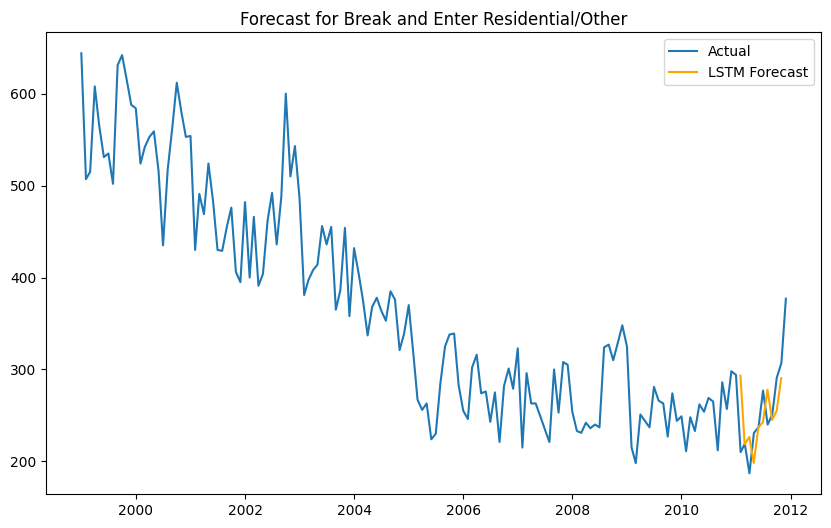

       TYPE  YEAR  MONTH  count       DATE
0  Mischief  1999      1    551 1999-01-01
1  Mischief  1999      2    484 1999-02-01
2  Mischief  1999      3    575 1999-03-01
3  Mischief  1999      4    621 1999-04-01
4  Mischief  1999      5    590 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0436
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0230
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0187
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0215
Epoch 12/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106
Epoch 13/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129
Epoch 14/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0338
Epoch 15/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/tmp/ipykernel_36/2546764884.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  val_range = pd.date_range(start=val_data['DATE'].iloc[0], periods=len(val_predict), freq='M')


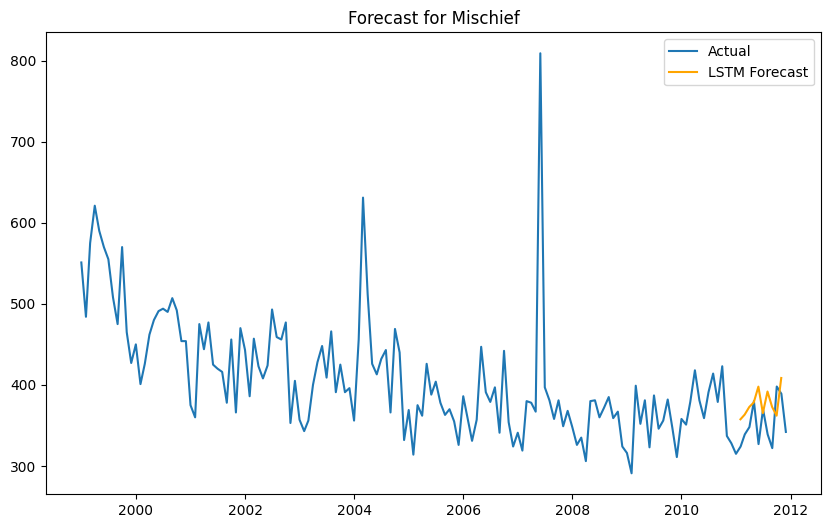

                       TYPE  YEAR  MONTH  count       DATE
0  Offence Against a Person  1999      1    338 1999-01-01
1  Offence Against a Person  1999      2    280 1999-02-01
2  Offence Against a Person  1999      3    315 1999-03-01
3  Offence Against a Person  1999      4    240 1999-04-01
4  Offence Against a Person  1999      5    290 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1252
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0272
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0266
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0295
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0237 
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0341
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0263
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0305
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286
Epoch 12/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0335 
Epoch 13/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0305
Epoch 14/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0287
Epoch 15/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/tmp/ipykernel_36/2546764884.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  val_range = pd.date_range(start=val_data['DATE'].iloc[0], periods=len(val_predict), freq='M')


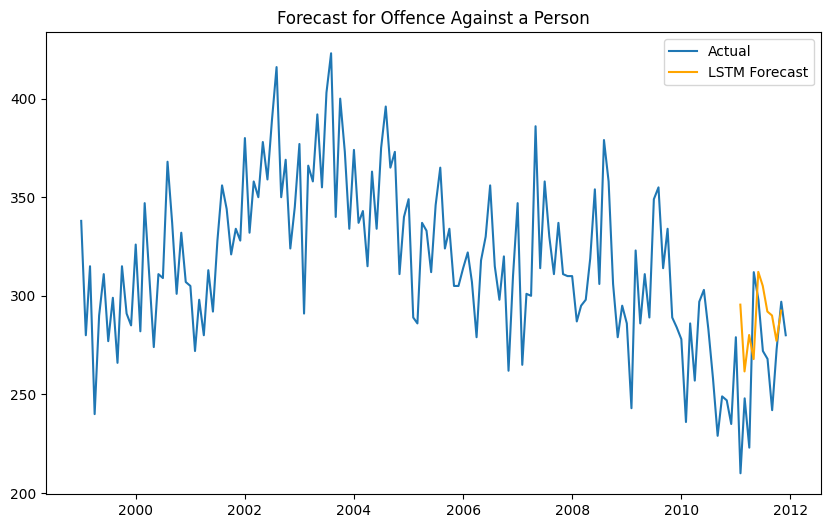

          TYPE  YEAR  MONTH  count       DATE
0  Other Theft  1999      1    247 1999-01-01
1  Other Theft  1999      2    219 1999-02-01
2  Other Theft  1999      3    208 1999-03-01
3  Other Theft  1999      4    235 1999-04-01
4  Other Theft  1999      5    223 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1502
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0246
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0159
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199
Epoch 12/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144
Epoch 13/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0157
Epoch 14/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0164
Epoch 15/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

/tmp/ipykernel_36/2546764884.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  val_range = pd.date_range(start=val_data['DATE'].iloc[0], periods=len(val_predict), freq='M')


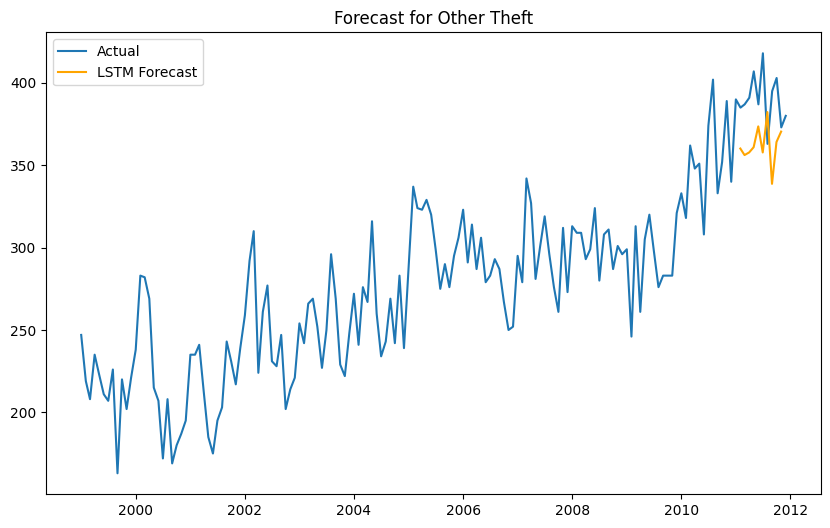

                 TYPE  YEAR  MONTH  count       DATE
0  Theft from Vehicle  1999      1   1438 1999-01-01
1  Theft from Vehicle  1999      2   1102 1999-02-01
2  Theft from Vehicle  1999      3   1251 1999-03-01
3  Theft from Vehicle  1999      4   1528 1999-04-01
4  Theft from Vehicle  1999      5   1873 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1159
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0240
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262 
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095
Epoch 12/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085
Epoch 13/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095
Epoch 14/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088
Epoch 15/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/tmp/ipykernel_36/2546764884.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  val_range = pd.date_range(start=val_data['DATE'].iloc[0], periods=len(val_predict), freq='M')


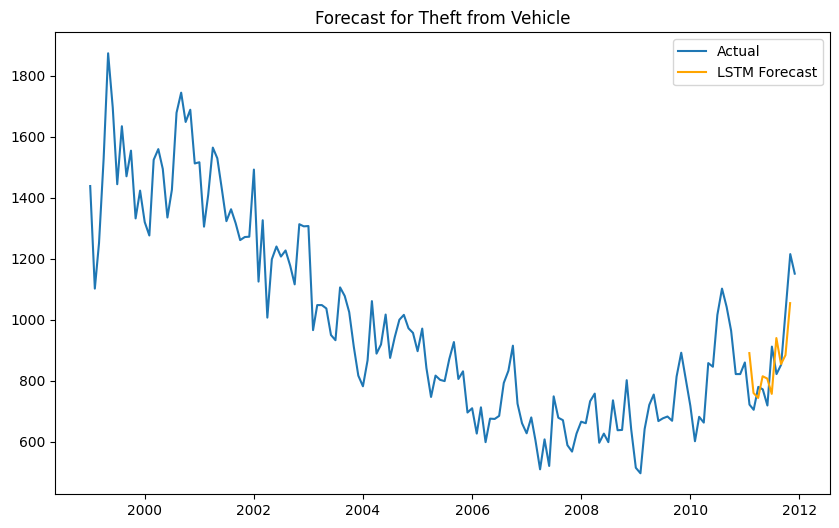

               TYPE  YEAR  MONTH  count       DATE
0  Theft of Bicycle  1999      1     96 1999-01-01
1  Theft of Bicycle  1999      2     71 1999-02-01
2  Theft of Bicycle  1999      3     76 1999-03-01
3  Theft of Bicycle  1999      4     97 1999-04-01
4  Theft of Bicycle  1999      5    114 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0660
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0215
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0230
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0164
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126 
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0159
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124 
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 12/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 
Epoch 13/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148
Epoch 14/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129
Epoch 15/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

/tmp/ipykernel_36/2546764884.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  val_range = pd.date_range(start=val_data['DATE'].iloc[0], periods=len(val_predict), freq='M')


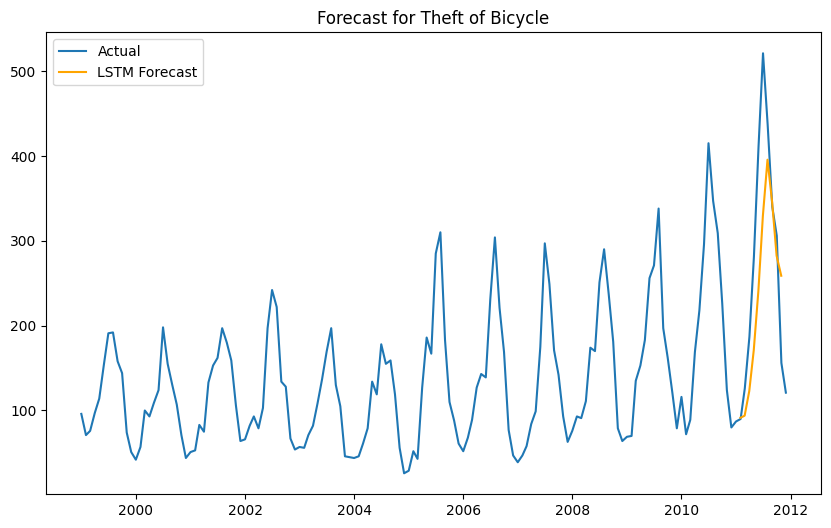

               TYPE  YEAR  MONTH  count       DATE
0  Theft of Vehicle  1999      1    640 1999-01-01
1  Theft of Vehicle  1999      2    528 1999-02-01
2  Theft of Vehicle  1999      3    569 1999-03-01
3  Theft of Vehicle  1999      4    476 1999-04-01
4  Theft of Vehicle  1999      5    541 1999-05-01
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1314
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0368
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049
Epoch 12/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 13/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 14/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 15/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/tmp/ipykernel_36/2546764884.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  val_range = pd.date_range(start=val_data['DATE'].iloc[0], periods=len(val_predict), freq='M')


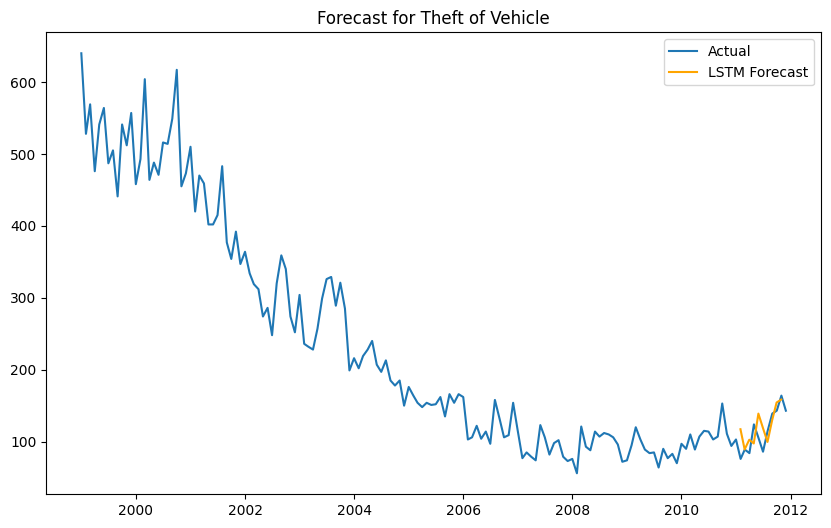

                                                TYPE  YEAR  MONTH  count  \
0  Vehicle Collision or Pedestrian Struck (with I...  1999      1    139   
1  Vehicle Collision or Pedestrian Struck (with I...  1999      2    103   
2  Vehicle Collision or Pedestrian Struck (with I...  1999      3    127   
3  Vehicle Collision or Pedestrian Struck (with I...  1999      4    141   
4  Vehicle Collision or Pedestrian Struck (with I...  1999      5    158   

        DATE  
0 1999-01-01  
1 1999-02-01  
2 1999-03-01  
3 1999-04-01  
4 1999-05-01  
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1283
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0228
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0252
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0208
Epoch 9/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0208
Epoch 10/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0224
Epoch 11/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0217
Epoch 12/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0229
Epoch 13/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0230
Epoch 14/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0224 
Epoch 15/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/tmp/ipykernel_36/2546764884.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  val_range = pd.date_range(start=val_data['DATE'].iloc[0], periods=len(val_predict), freq='M')


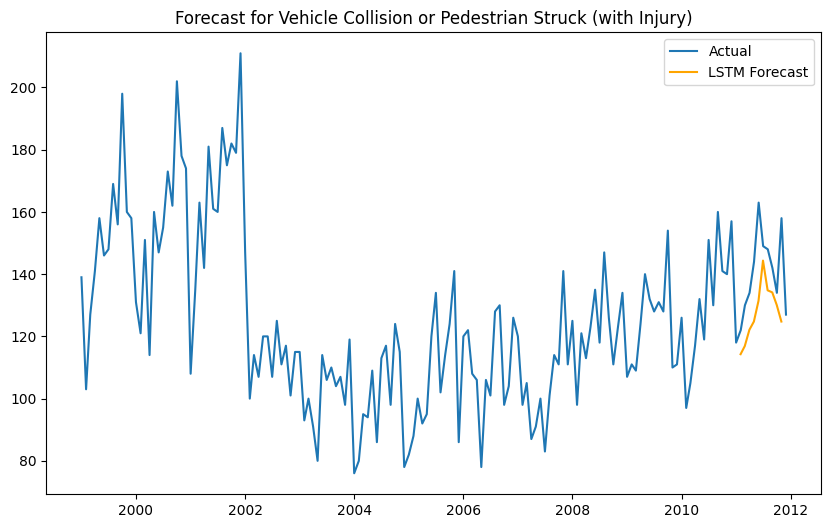

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = train_grp.copy()

# Combine YEAR and MONTH into a single datetime column for better plotting
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Prepare a function to create LSTM dataset
def create_lstm_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Plot each type separately
for name in df.TYPE.unique():
    tr = df[df.TYPE == name]
    tr = tr.reset_index(drop=True)
    print(tr.head())
    
    # Define the training and validation datasets
    train_data = tr[:-12]  # All data except the last 4 months
    val_data = tr[-12:]  # Last 4 months

    # Scaling the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data['count'].values.reshape(-1, 1))
    val_scaled = scaler.transform(val_data['count'].values.reshape(-1, 1))
    
    # Create LSTM dataset
    time_step = 1  # Number of previous timesteps to consider for the LSTM
    X_train, y_train = create_lstm_dataset(train_scaled, time_step)
    X_val, y_val = create_lstm_dataset(val_scaled, time_step)
    
    # Reshape input to be [samples, time steps, features] which is required for LSTM
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

    # Build LSTM Model
    model = Sequential()
    model.add(LSTM(50, return_sequences=False, input_shape=(time_step, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

    # Make predictions on the validation set
    train_predict = model.predict(X_train)
    val_predict = model.predict(X_val)

    # Inverse transform to get the original scale of predictions
    train_predict = scaler.inverse_transform(train_predict)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    val_predict = scaler.inverse_transform(val_predict)
    y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, val_predict))
    print(f'RMSE for {name}: {rmse:.2f}')
    
    # Plotting the actual time series and predictions
    plt.figure(figsize=(10, 6))
    plt.plot(tr['DATE'], tr['count'], label='Actual')
    
    # Create a plot range for predictions aligned with the validation set
    val_range = pd.date_range(start=val_data['DATE'].iloc[0], periods=len(val_predict), freq='M')
    plt.plot(val_range, val_predict, label='LSTM Forecast', color='orange')

    plt.legend(["Actual", "LSTM Forecast"])
    plt.title(f'Forecast for {name}')
    plt.show()


                         TYPE  YEAR  MONTH  count       DATE
0  Break and Enter Commercial  1999      1    303 1999-01-01
1  Break and Enter Commercial  1999      2    254 1999-02-01
2  Break and Enter Commercial  1999      3    292 1999-03-01
3  Break and Enter Commercial  1999      4    266 1999-04-01
4  Break and Enter Commercial  1999      5    291 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1454.196, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1437.493, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1418.862, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1452.244, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1417.083, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1418.847, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1412.238, Time=0.12 se

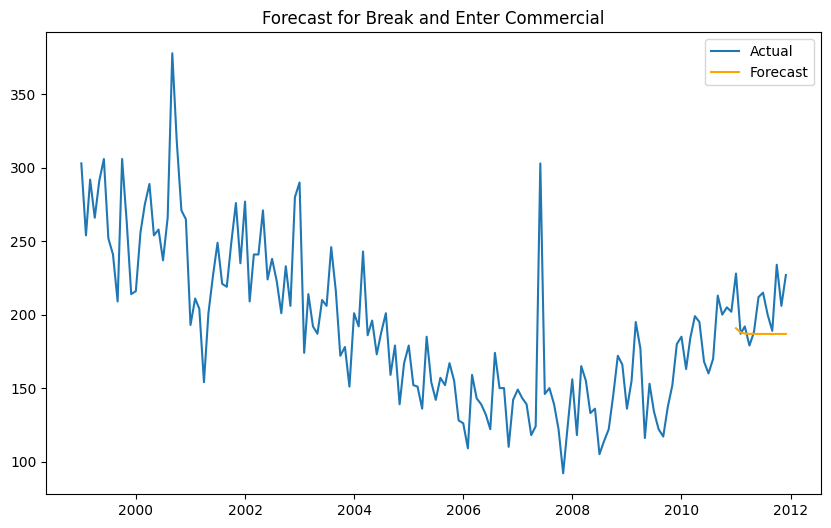

                                TYPE  YEAR  MONTH  count       DATE
0  Break and Enter Residential/Other  1999      1    644 1999-01-01
1  Break and Enter Residential/Other  1999      2    507 1999-02-01
2  Break and Enter Residential/Other  1999      3    515 1999-03-01
3  Break and Enter Residential/Other  1999      4    608 1999-04-01
4  Break and Enter Residential/Other  1999      5    565 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1518.075, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1504.402, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1497.483, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1516.435, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1499.456, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1494.765, Time=0.77 sec
 ARIMA(0,1,1)(1,0,2)[12

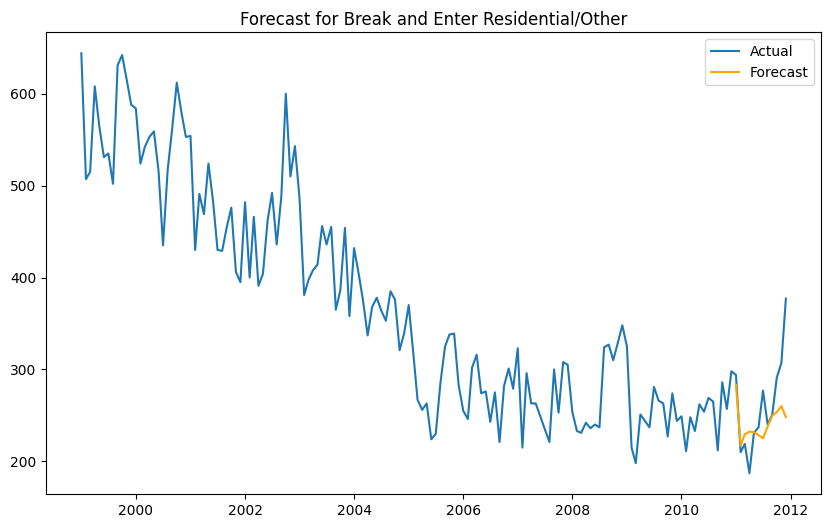

       TYPE  YEAR  MONTH  count       DATE
0  Mischief  1999      1    551 1999-01-01
1  Mischief  1999      2    484 1999-02-01
2  Mischief  1999      3    575 1999-03-01
3  Mischief  1999      4    621 1999-04-01
4  Mischief  1999      5    590 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1630.998, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1604.744, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1583.461, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1629.066, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1582.729, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1583.225, Time=0.31 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1579.698, Time=0.10 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1

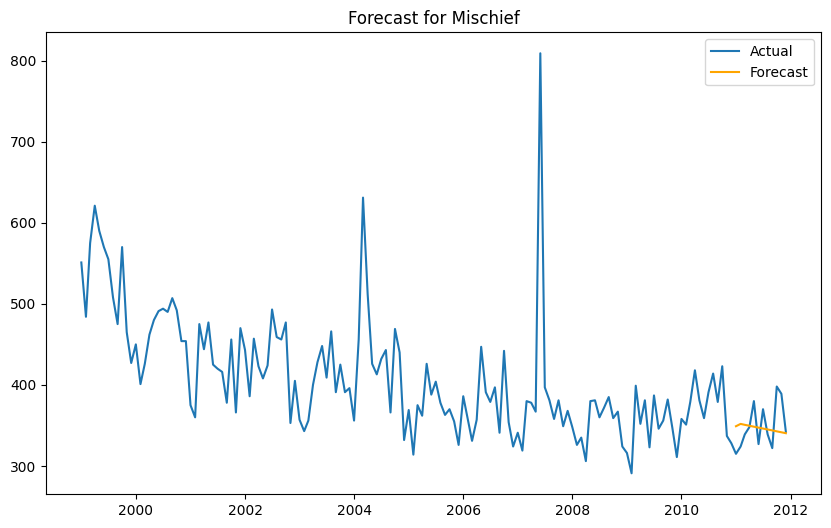

                       TYPE  YEAR  MONTH  count       DATE
0  Offence Against a Person  1999      1    338 1999-01-01
1  Offence Against a Person  1999      2    280 1999-02-01
2  Offence Against a Person  1999      3    315 1999-03-01
3  Offence Against a Person  1999      4    240 1999-04-01
4  Offence Against a Person  1999      5    290 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1354.772, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1444.060, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1390.533, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1378.175, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1442.114, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1381.379, Time=0.64 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1373.728, Time=0.85 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1356.084, Time=2.65 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1356.064, Time=2.40 sec


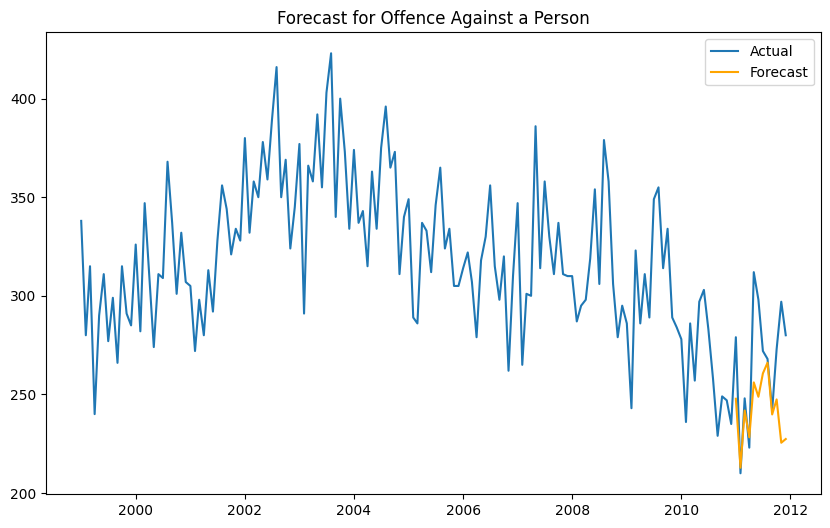

          TYPE  YEAR  MONTH  count       DATE
0  Other Theft  1999      1    247 1999-01-01
1  Other Theft  1999      2    219 1999-02-01
2  Other Theft  1999      3    208 1999-03-01
3  Other Theft  1999      4    235 1999-04-01
4  Other Theft  1999      5    223 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.97 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1383.132, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1368.063, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1358.940, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1381.199, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1359.219, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1350.070, Time=0.54 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1358.206, Time=0.23 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1350.495, Time=1.02 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1350.100, Time=1.19 sec
 ARIMA(0,1,1)(0,

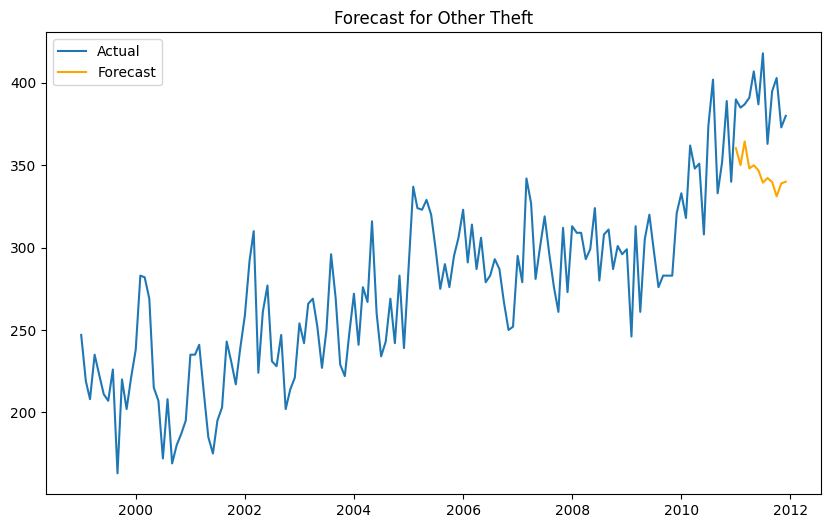

                 TYPE  YEAR  MONTH  count       DATE
0  Theft from Vehicle  1999      1   1438 1999-01-01
1  Theft from Vehicle  1999      2   1102 1999-02-01
2  Theft from Vehicle  1999      3   1251 1999-03-01
3  Theft from Vehicle  1999      4   1528 1999-04-01
4  Theft from Vehicle  1999      5   1873 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1789.049, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1784.042, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1781.651, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1787.221, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1780.677, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1781.345, Time=0.24 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1777.616, Time=0.75 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1779.259, Time=1.23 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AI

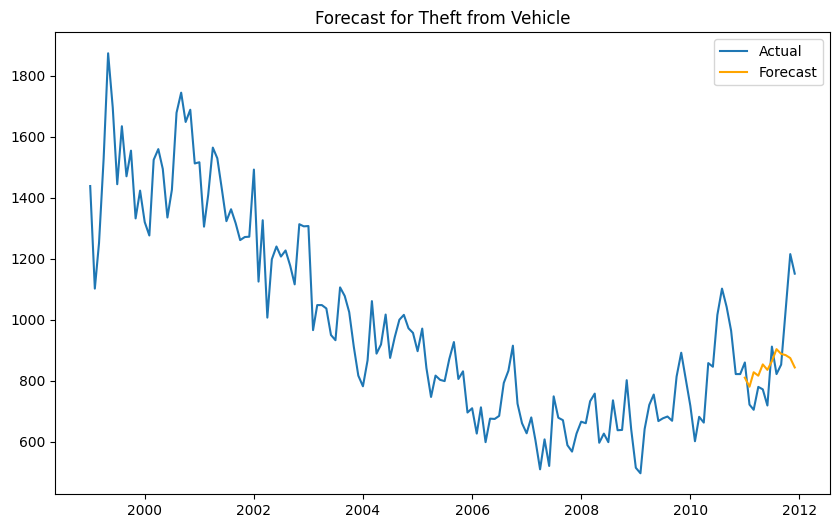

               TYPE  YEAR  MONTH  count       DATE
0  Theft of Bicycle  1999      1     96 1999-01-01
1  Theft of Bicycle  1999      2     71 1999-02-01
2  Theft of Bicycle  1999      3     76 1999-03-01
3  Theft of Bicycle  1999      4     97 1999-04-01
4  Theft of Bicycle  1999      5    114 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1518.158, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1463.285, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1486.141, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1516.159, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1504.042, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1420.800, Time=0.71 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1486.117, Time=0.29 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1419.740, Time=

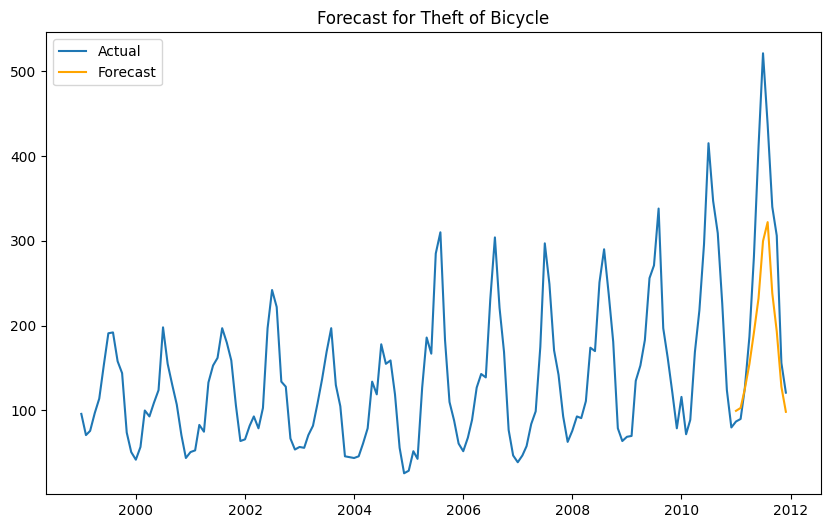

               TYPE  YEAR  MONTH  count       DATE
0  Theft of Vehicle  1999      1    640 1999-01-01
1  Theft of Vehicle  1999      2    528 1999-02-01
2  Theft of Vehicle  1999      3    569 1999-03-01
3  Theft of Vehicle  1999      4    476 1999-04-01
4  Theft of Vehicle  1999      5    541 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1473.731, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1452.860, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1437.776, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1472.950, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1436.292, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1437.617, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1440.291, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1437.742, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1437.746, 

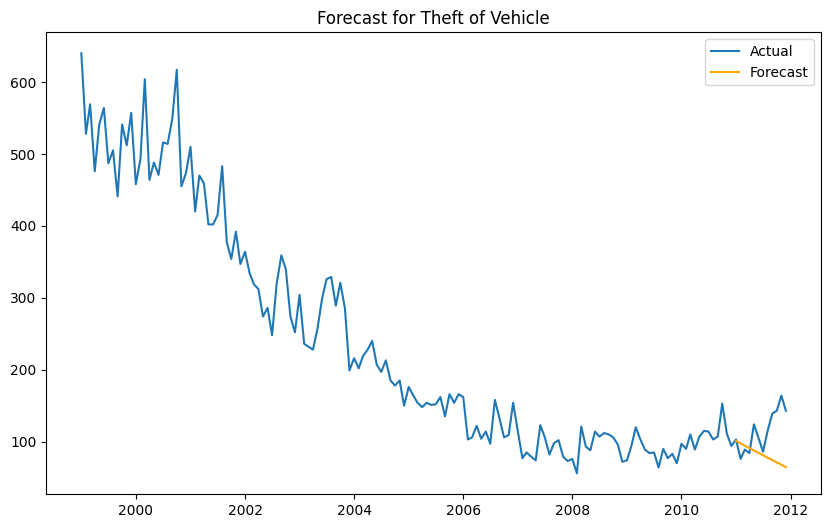

                                                TYPE  YEAR  MONTH  count  \
0  Vehicle Collision or Pedestrian Struck (with I...  1999      1    139   
1  Vehicle Collision or Pedestrian Struck (with I...  1999      2    103   
2  Vehicle Collision or Pedestrian Struck (with I...  1999      3    127   
3  Vehicle Collision or Pedestrian Struck (with I...  1999      4    141   
4  Vehicle Collision or Pedestrian Struck (with I...  1999      5    158   

        DATE  
0 1999-01-01  
1 1999-02-01  
2 1999-03-01  
3 1999-04-01  
4 1999-05-01  
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1291.408, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1261.136, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1251.755, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1289.412, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1260.297, Time=0.08 sec
 ARIMA(0,1,1)

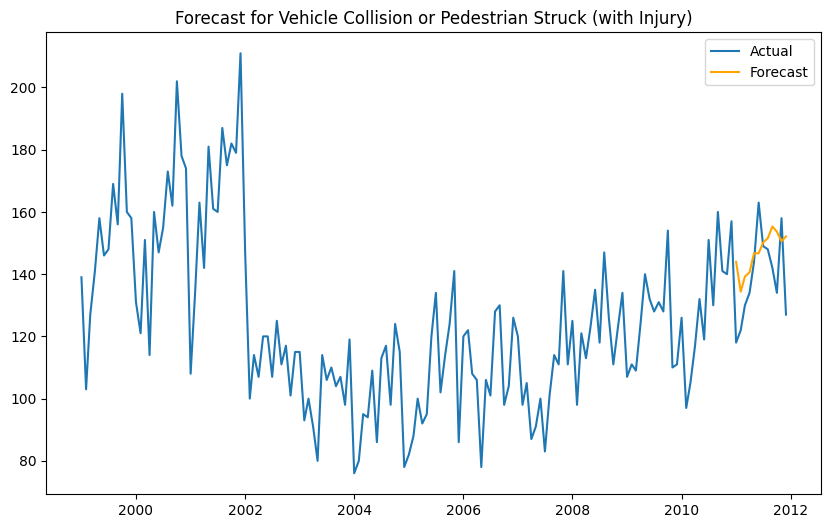

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

df = train_grp.copy()

# Combine YEAR and MONTH into a single datetime column for better plotting
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Plot each type separately
for name in df.TYPE.unique():
    tr = df[df.TYPE == name]
    tr = tr.reset_index(drop=True)
    print(tr.head())
    #break
    #tr = tr[[]]
    
    # Define the training and validation datasets
    train_data = tr[:-12]  # All data except the last 4 months
    val_data = tr[-12:]  # Last 4 months
    
    # Fit AutoARIMA model on the training data
    arima_model = auto_arima(train_data['count'].values, seasonal=True, m=12, trace=True)
    print(1)
    # Forecast for validation length (4 months in this case)
    forecast = arima_model.predict(n_periods=len(val_data))
    
    # Calculate RMSE between actual and forecasted values
    rmse = np.sqrt(mean_squared_error(val_data['count'].values, forecast))
    print(f'RMSE for {name}: {rmse:.2f}')
    
    # Plotting the actual time series
    plt.figure(figsize=(10, 6))
    plt.plot(tr['DATE'], tr['count'], label='Actual')
    
    # Plotting the forecasted values for validation period
    plt.plot(val_data['DATE'], forecast, label='Forecast', color='orange')
    
    # Optionally, add prediction intervals (confidence intervals)
    conf_int = arima_model.conf_int(alpha=0.05)
    #plt.fill_between(val_data['DATE'], conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='95% Prediction Interval')
    
    plt.legend(["Actual", "Forecast", "95% Prediction Interval"])
    plt.title(f'Forecast for {name}')
    plt.show()


                         TYPE  YEAR  MONTH  count       DATE
0  Break and Enter Commercial  1999      1    303 1999-01-01
1  Break and Enter Commercial  1999      2    254 1999-02-01
2  Break and Enter Commercial  1999      3    292 1999-03-01
3  Break and Enter Commercial  1999      4    266 1999-04-01
4  Break and Enter Commercial  1999      5    291 1999-05-01
Performing stepwise search to minimize aic


/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1416.182, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1454.196, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1436.025, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1417.083, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1452.244, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1414.221, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1413.006, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1413.991, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1412.238, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1414.214, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1431.054, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1411.672, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1415.744, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1434.102, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1413.662, Time=0.07 sec
 ARIMA(1,1

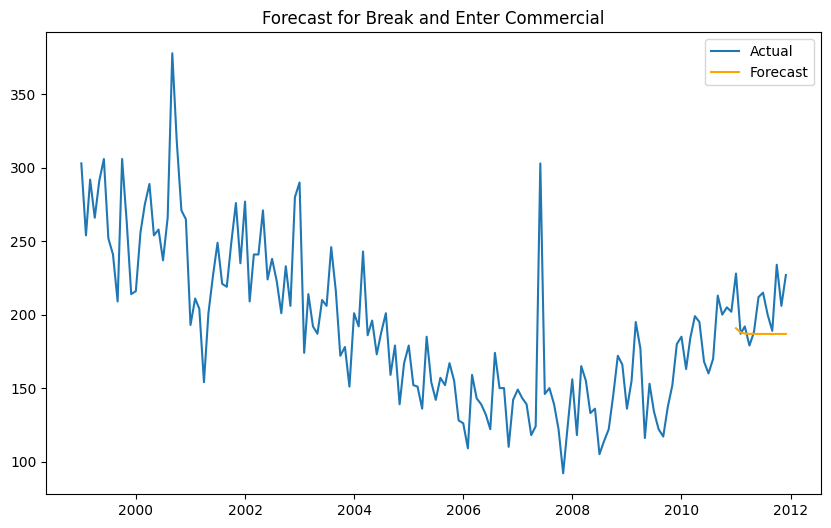

                                TYPE  YEAR  MONTH  count       DATE
0  Break and Enter Residential/Other  1999      1    644 1999-01-01
1  Break and Enter Residential/Other  1999      2    507 1999-02-01
2  Break and Enter Residential/Other  1999      3    515 1999-03-01
3  Break and Enter Residential/Other  1999      4    608 1999-04-01
4  Break and Enter Residential/Other  1999      5    565 1999-05-01
Performing stepwise search to minimize aic


/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1493.679, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1518.075, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1507.306, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1499.456, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1516.435, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1491.839, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1492.889, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1489.909, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1491.824, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1504.808, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1493.521, Time=0.05 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.072 seconds
1
RMSE for Break and Enter Residential/Other: 61.75


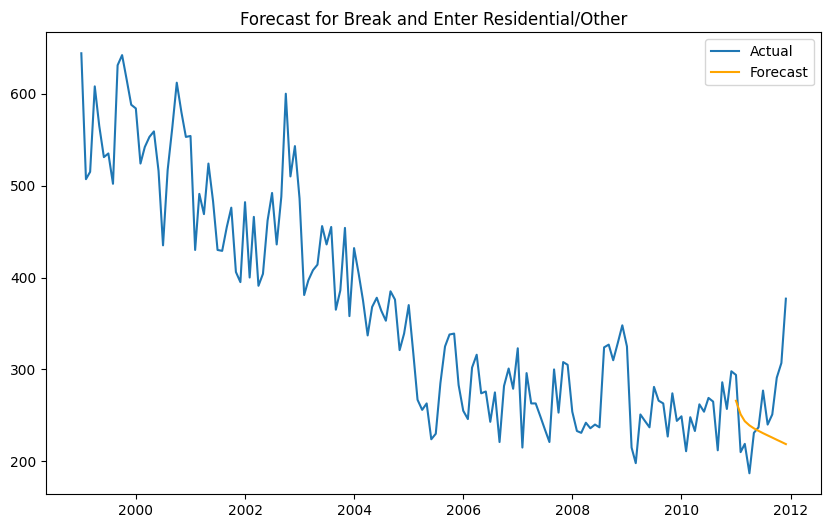

       TYPE  YEAR  MONTH  count       DATE
0  Mischief  1999      1    551 1999-01-01
1  Mischief  1999      2    484 1999-02-01
2  Mischief  1999      3    575 1999-03-01
3  Mischief  1999      4    621 1999-04-01
4  Mischief  1999      5    590 1999-05-01
Performing stepwise search to minimize aic


/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1630.998, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1603.959, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1582.729, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1629.066, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1579.698, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1584.639, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1582.855, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1580.701, Time=0.07 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.540 seconds
1
RMSE for Mischief: 28.69


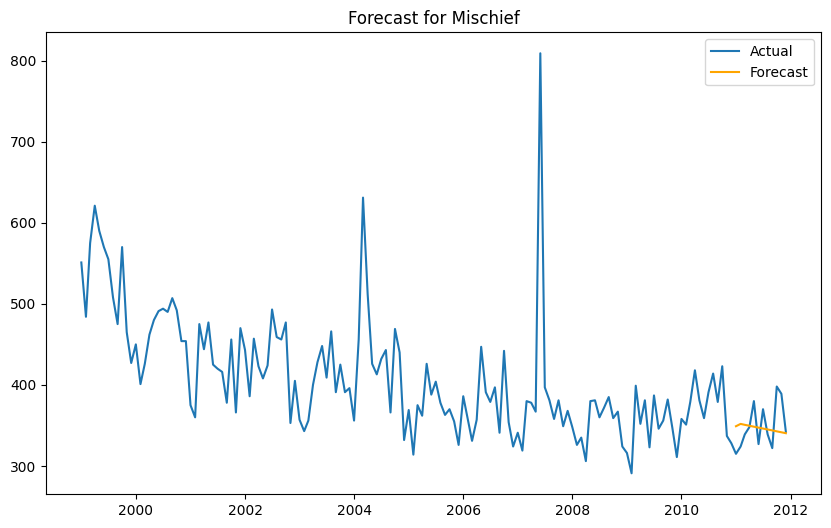

                       TYPE  YEAR  MONTH  count       DATE
0  Offence Against a Person  1999      1    338 1999-01-01
1  Offence Against a Person  1999      2    280 1999-02-01
2  Offence Against a Person  1999      3    315 1999-03-01
3  Offence Against a Person  1999      4    240 1999-04-01
4  Offence Against a Person  1999      5    290 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1390.326, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1444.060, Time=0.01 sec


/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1399.993, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1389.904, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1442.114, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1391.767, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1391.842, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1393.783, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1388.153, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1390.037, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1390.103, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1398.095, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1392.016, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.873 seconds
1
RMSE for Offence Against a Person: 33.95


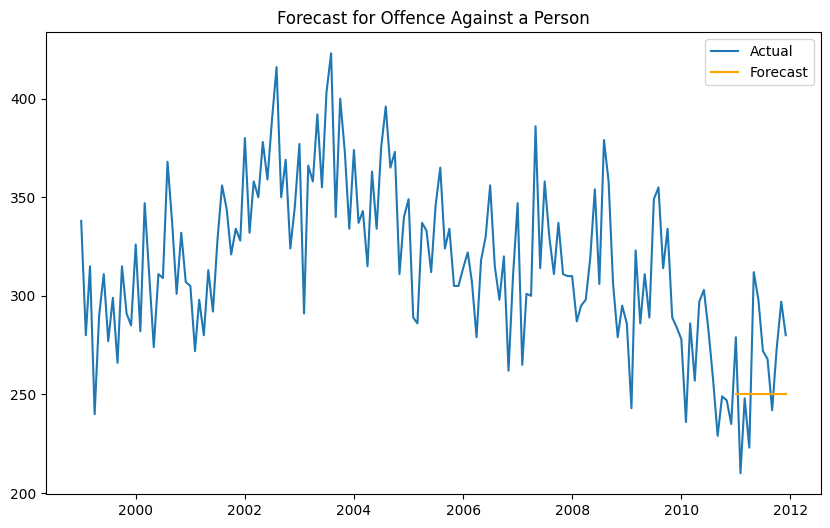

          TYPE  YEAR  MONTH  count       DATE
0  Other Theft  1999      1    247 1999-01-01
1  Other Theft  1999      2    219 1999-02-01
2  Other Theft  1999      3    208 1999-03-01
3  Other Theft  1999      4    235 1999-04-01
4  Other Theft  1999      5    223 1999-05-01
Performing stepwise search to minimize aic


/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1383.132, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1366.833, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1359.219, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1381.199, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1357.064, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1354.781, Time=0.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1356.423, Time=0.21 sec

Best model:  ARIMA(1,1,3)(0,0,0)[0] intercept
Tot

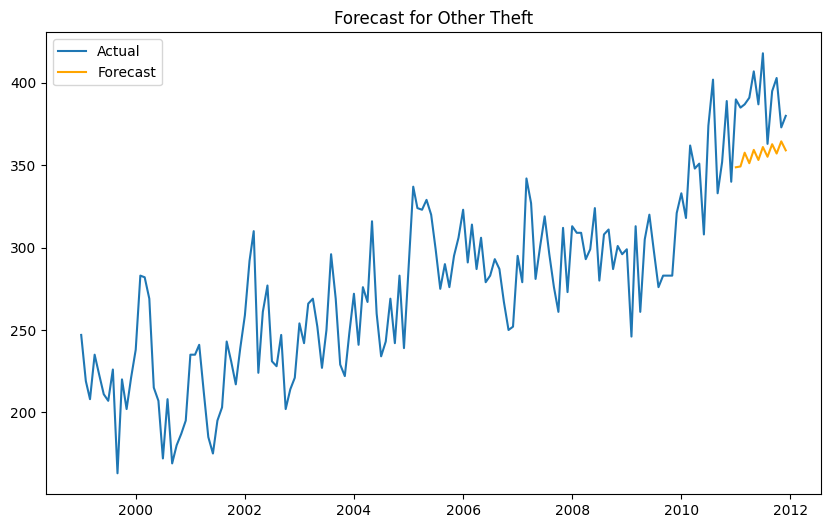

                 TYPE  YEAR  MONTH  count       DATE
0  Theft from Vehicle  1999      1   1438 1999-01-01
1  Theft from Vehicle  1999      2   1102 1999-02-01
2  Theft from Vehicle  1999      3   1251 1999-03-01
3  Theft from Vehicle  1999      4   1528 1999-04-01
4  Theft from Vehicle  1999      5   1873 1999-05-01
Performing stepwise search to minimize aic


/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1789.049, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1783.721, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1780.677, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1787.221, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1770.208, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1771.983, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1772.096, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1774.667, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1784.962, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1770.019, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1778.986, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1781.939, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1771.770, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1771.898, Time=0.13 sec
 ARIMA(0,1,2)(0

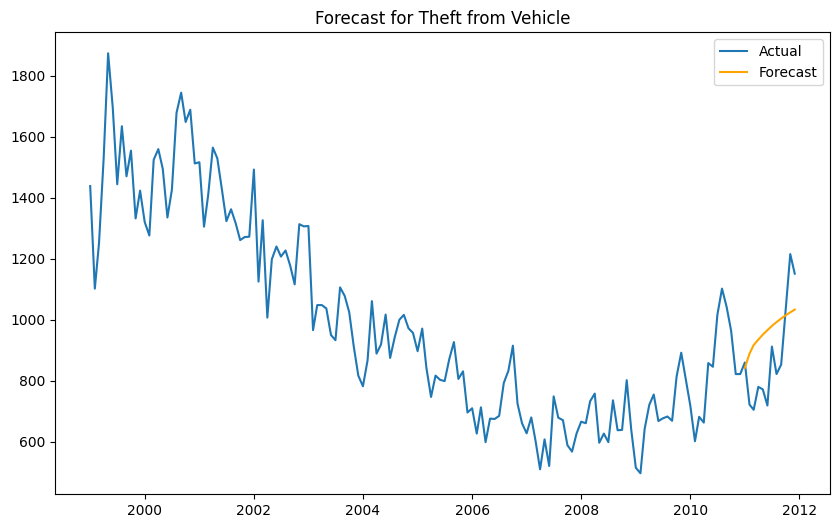

               TYPE  YEAR  MONTH  count       DATE
0  Theft of Bicycle  1999      1     96 1999-01-01
1  Theft of Bicycle  1999      2     71 1999-02-01
2  Theft of Bicycle  1999      3     76 1999-03-01
3  Theft of Bicycle  1999      4     97 1999-04-01
4  Theft of Bicycle  1999      5    114 1999-05-01
Performing stepwise search to minimize aic


/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1423.808, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1518.158, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1504.042, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1505.531, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1516.159, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1508.034, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1422.841, Time=0.65 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1419.975, Time=0.88 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1418.127, Time=0.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AI

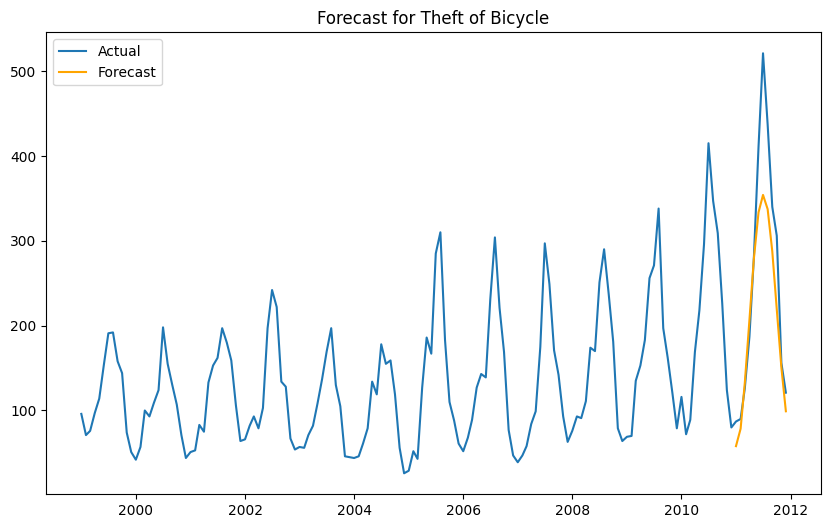

               TYPE  YEAR  MONTH  count       DATE
0  Theft of Vehicle  1999      1    640 1999-01-01
1  Theft of Vehicle  1999      2    528 1999-02-01
2  Theft of Vehicle  1999      3    569 1999-03-01
3  Theft of Vehicle  1999      4    476 1999-04-01
4  Theft of Vehicle  1999      5    541 1999-05-01
Performing stepwise search to minimize aic


/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1473.731, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1450.860, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1436.292, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1472.950, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1437.742, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1437.746, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1440.992, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.941 seconds
1
RMSE for Theft of Vehicle: 48.68


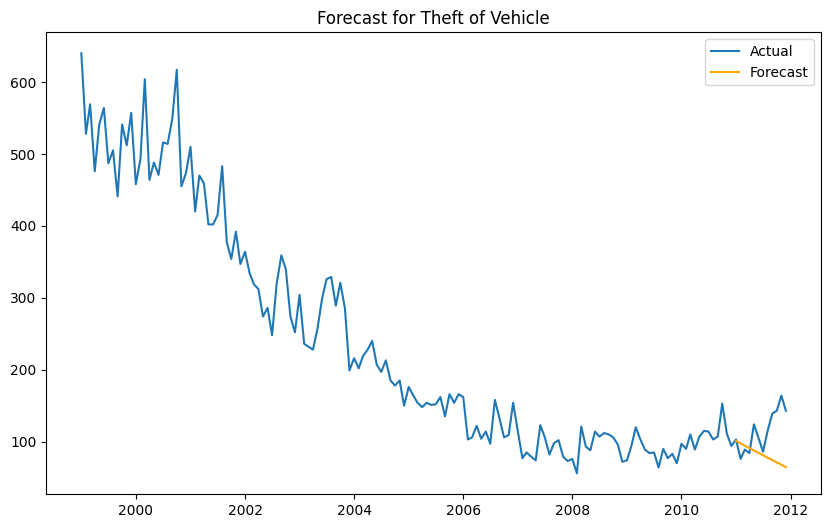

                                                TYPE  YEAR  MONTH  count  \
0  Vehicle Collision or Pedestrian Struck (with I...  1999      1    139   
1  Vehicle Collision or Pedestrian Struck (with I...  1999      2    103   
2  Vehicle Collision or Pedestrian Struck (with I...  1999      3    127   
3  Vehicle Collision or Pedestrian Struck (with I...  1999      4    141   
4  Vehicle Collision or Pedestrian Struck (with I...  1999      5    158   

        DATE  
0 1999-01-01  
1 1999-02-01  
2 1999-03-01  
3 1999-04-01  
4 1999-05-01  
Performing stepwise search to minimize aic


/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1261.014, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1291.408, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1266.217, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1260.297, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1289.412, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1260.623, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1261.891, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1259.982, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1263.618, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1260.267, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1259.024, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1264.557, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1261.003, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1266.225, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1257.989, Time=0.22 sec
 ARIMA(4,1

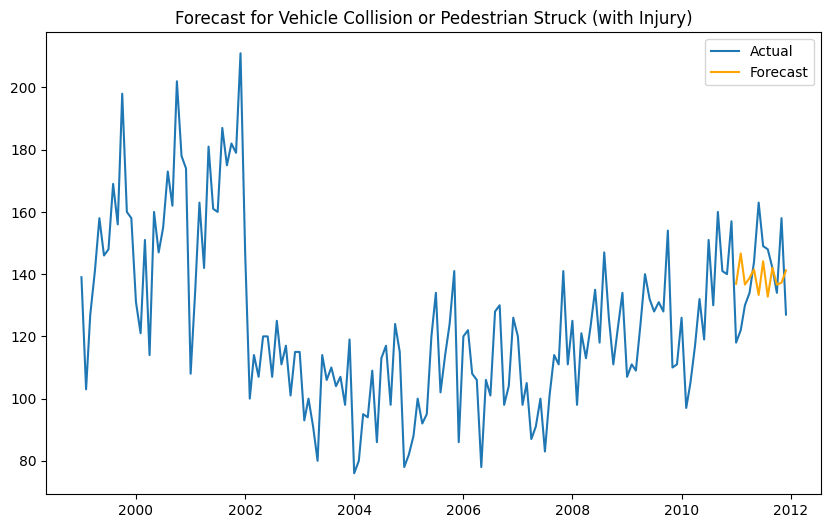

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

df = train_grp.copy()

# Combine YEAR and MONTH into a single datetime column for better plotting
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Plot each type separately
for name in df.TYPE.unique():
    tr = df[df.TYPE == name]
    tr = tr.reset_index(drop=True)
    print(tr.head())
    #break
    #tr = tr[[]]
    
    # Define the training and validation datasets
    train_data = tr[:-12]  # All data except the last 4 months
    val_data = tr[-12:]  # Last 4 months
    
    # Fit AutoARIMA model on the training data
    arima_model = auto_arima(train_data['count'].values, seasonal=False, m=12, trace=True)
    print(1)
    # Forecast for validation length (4 months in this case)
    forecast = arima_model.predict(n_periods=len(val_data))
    
    # Calculate RMSE between actual and forecasted values
    rmse = np.sqrt(mean_squared_error(val_data['count'].values, forecast))
    print(f'RMSE for {name}: {rmse:.2f}')
    
    # Plotting the actual time series
    plt.figure(figsize=(10, 6))
    plt.plot(tr['DATE'], tr['count'], label='Actual')
    
    # Plotting the forecasted values for validation period
    plt.plot(val_data['DATE'], forecast, label='Forecast', color='orange')
    
    # Optionally, add prediction intervals (confidence intervals)
    conf_int = arima_model.conf_int(alpha=0.05)
    #plt.fill_between(val_data['DATE'], conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='95% Prediction Interval')
    
    plt.legend(["Actual", "Forecast", "95% Prediction Interval"])
    plt.title(f'Forecast for {name}')
    plt.show()


In [26]:
test.describe()

YEAR       MONTH  Incident_Counts
count   162.000000  162.000000              0.0
mean   2012.333333    5.500000              NaN
std       0.472866    3.314283              NaN
min    2012.000000    1.000000              NaN
25%    2012.000000    3.000000              NaN
50%    2012.000000    5.000000              NaN
75%    2013.000000    8.000000              NaN
max    2013.000000   12.000000              NaN

                         TYPE  YEAR  MONTH  count       DATE
0  Break and Enter Commercial  1999      1    303 1999-01-01
1  Break and Enter Commercial  1999      2    254 1999-02-01
2  Break and Enter Commercial  1999      3    292 1999-03-01
3  Break and Enter Commercial  1999      4    266 1999-04-01
4  Break and Enter Commercial  1999      5    291 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1568.319, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1549.136, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1529.249, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1566.345, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1527.441, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1529.235, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1523.207, Time=0.12 se

/tmp/ipykernel_36/2265858746.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=18, freq='M')


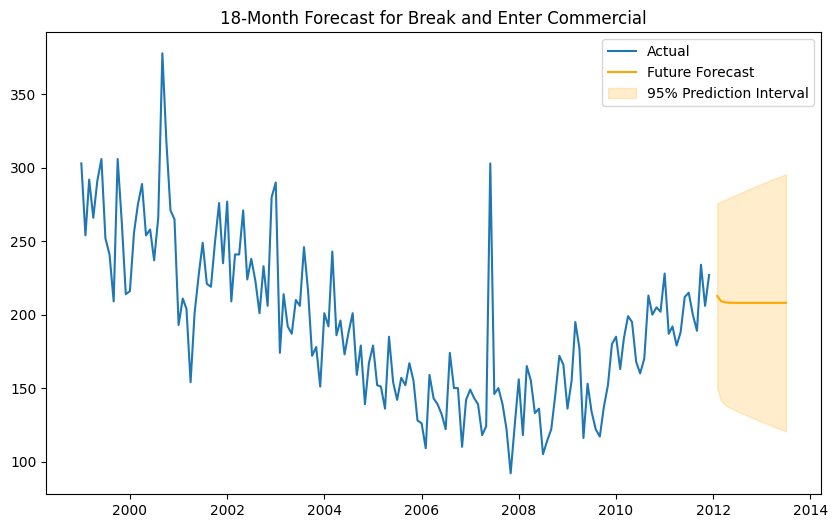

                                TYPE  YEAR  MONTH  count       DATE
0  Break and Enter Residential/Other  1999      1    644 1999-01-01
1  Break and Enter Residential/Other  1999      2    507 1999-02-01
2  Break and Enter Residential/Other  1999      3    515 1999-03-01
3  Break and Enter Residential/Other  1999      4    608 1999-04-01
4  Break and Enter Residential/Other  1999      5    565 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1600.805, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1641.871, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1626.655, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1621.774, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1640.073, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1617.217, Time=0.68 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1615.285, Time=0.81 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1602.052, Time=2.90 sec
 ARIMA(2,1,2)

/tmp/ipykernel_36/2265858746.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=18, freq='M')


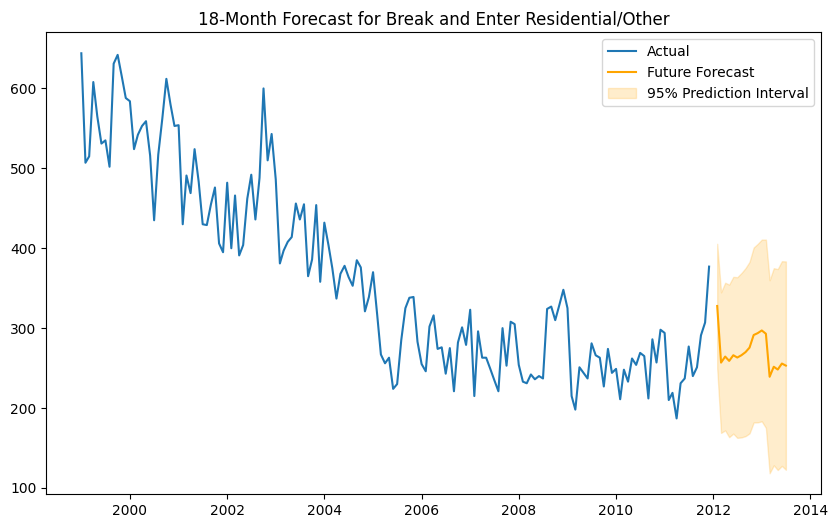

       TYPE  YEAR  MONTH  count       DATE
0  Mischief  1999      1    551 1999-01-01
1  Mischief  1999      2    484 1999-02-01
2  Mischief  1999      3    575 1999-03-01
3  Mischief  1999      4    621 1999-04-01
4  Mischief  1999      5    590 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1758.315, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1729.444, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1706.516, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1756.374, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1705.880, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1706.231, Time=0.34 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1702.088, Time=0.13 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1

/tmp/ipykernel_36/2265858746.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=18, freq='M')


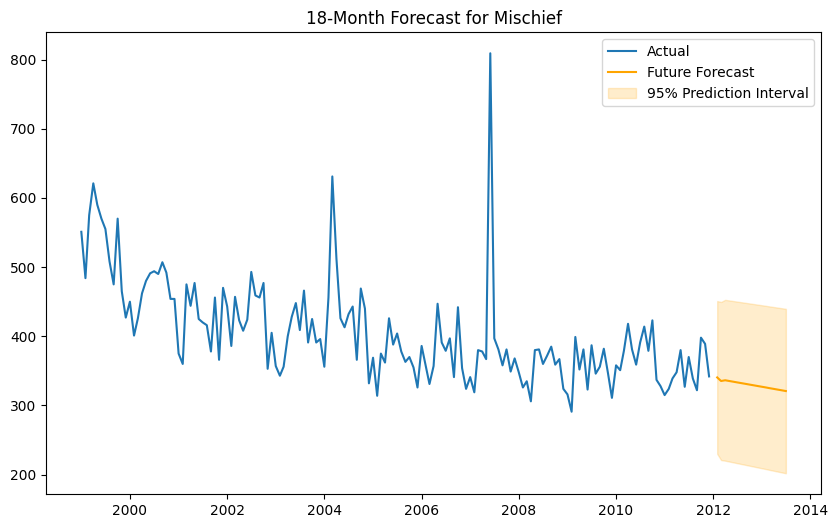

                       TYPE  YEAR  MONTH  count       DATE
0  Offence Against a Person  1999      1    338 1999-01-01
1  Offence Against a Person  1999      2    280 1999-02-01
2  Offence Against a Person  1999      3    315 1999-03-01
3  Offence Against a Person  1999      4    240 1999-04-01
4  Offence Against a Person  1999      5    290 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1470.156, Time=1.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1567.432, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1506.216, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1493.438, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1565.447, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1495.993, Time=0.54 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1471.970, Time=2.93 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1471.985, Time=2.95 sec
 ARIM

/tmp/ipykernel_36/2265858746.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=18, freq='M')


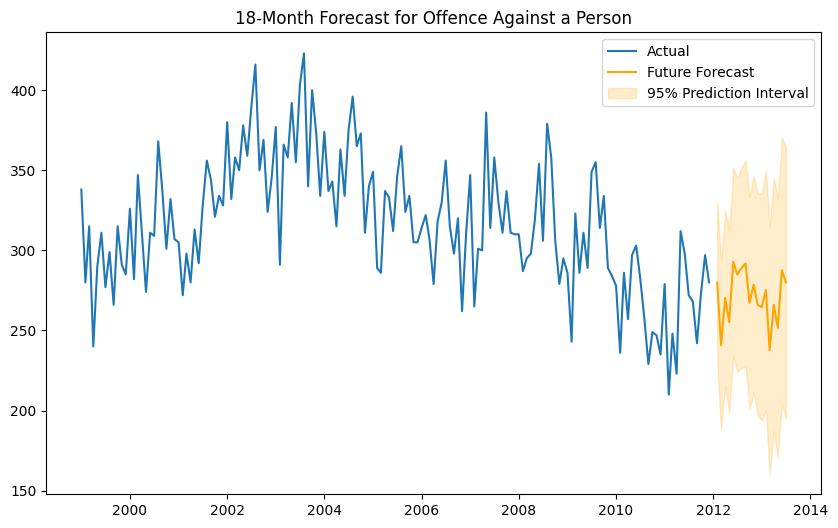

          TYPE  YEAR  MONTH  count       DATE
0  Other Theft  1999      1    247 1999-01-01
1  Other Theft  1999      2    219 1999-02-01
2  Other Theft  1999      3    208 1999-03-01
3  Other Theft  1999      4    235 1999-04-01
4  Other Theft  1999      5    223 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1497.000, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1477.394, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1467.208, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1495.128, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1467.357, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1457.539, Time=0.60 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1466.538, Time=0.26 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1457.891, Time=1.05 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1457.595, Time=1.24 sec
 ARIMA(0,1,1)(0,

/tmp/ipykernel_36/2265858746.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=18, freq='M')


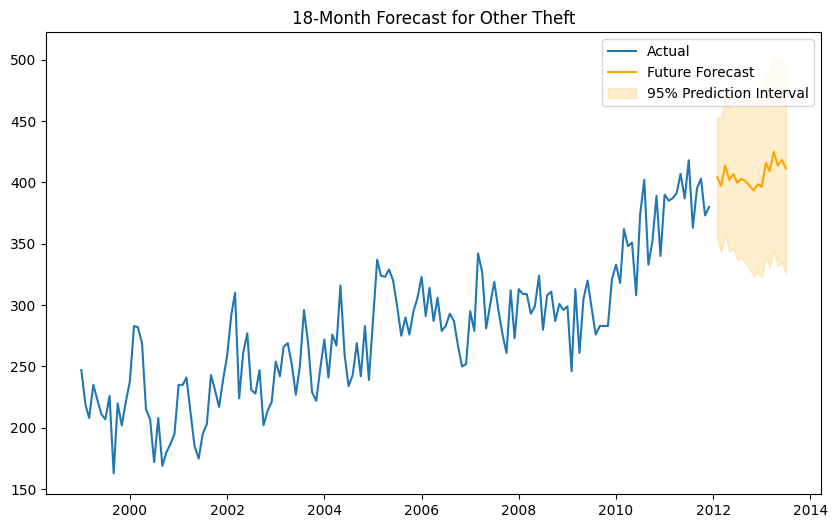

                 TYPE  YEAR  MONTH  count       DATE
0  Theft from Vehicle  1999      1   1438 1999-01-01
1  Theft from Vehicle  1999      2   1102 1999-02-01
2  Theft from Vehicle  1999      3   1251 1999-03-01
3  Theft from Vehicle  1999      4   1528 1999-04-01
4  Theft from Vehicle  1999      5   1873 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1918.042, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1936.363, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1931.836, Time=0.38 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1929.802, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1934.398, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1917.791, Time=3.13 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=2.69 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Tim

/tmp/ipykernel_36/2265858746.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=18, freq='M')


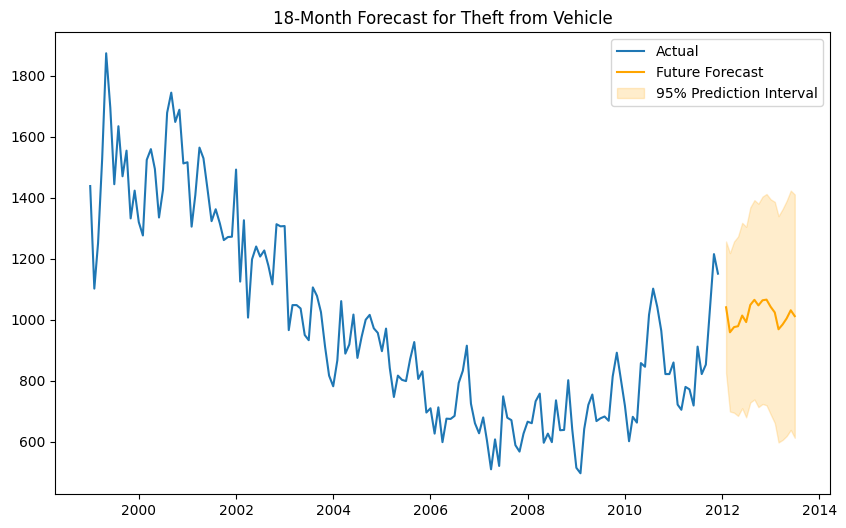

               TYPE  YEAR  MONTH  count       DATE
0  Theft of Bicycle  1999      1     96 1999-01-01
1  Theft of Bicycle  1999      2     71 1999-02-01
2  Theft of Bicycle  1999      3     76 1999-03-01
3  Theft of Bicycle  1999      4     97 1999-04-01
4  Theft of Bicycle  1999      5    114 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1538.300, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1667.767, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1591.162, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1622.162, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1665.769, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1547.055, Time=1.17 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1563.242, Time=1.46 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=3.02 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1548.244, Time=5.12 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1552.051, 

/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,1)(2,0,2)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/opt/conda/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/opt/conda/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/opt/conda/lib/python3.10/site-packa

 ARIMA(2,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1554.804, Time=0.66 sec
 ARIMA(3,1,1)(1,0,1)[12] intercept   : AIC=1539.624, Time=1.39 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1556.284, Time=0.44 sec
 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=1556.738, Time=3.08 sec
 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(2,1,1)(1,0,1)[12]             : AIC=1536.098, Time=0.85 sec
 ARIMA(2,1,1)(0,0,1)[12]             : AIC=1623.889, Time=0.34 sec
 ARIMA(2,1,1)(1,0,0)[12]             : AIC=1565.964, Time=0.71 sec
 ARIMA(2,1,1)(2,0,1)[12]             : AIC=1537.947, Time=2.62 sec
 ARIMA(2,1,1)(1,0,2)[12]             : AIC=1537.876, Time=2.70 sec
 ARIMA(2,1,1)(0,0,0)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(2,1,1)(0,0,2)[12]             : AIC=1614.873, Time=1.19 sec
 ARIMA(2,1,1)(2,0,0)[12]             : AIC=1547.182, Time=1.28 sec
 ARIMA(2,1,1)(2,

/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,1)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/opt/conda/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/opt/conda/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/opt/conda/lib/python3.10/site-packa

 ARIMA(1,1,1)(2,0,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=1553.111, Time=0.34 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=1554.284, Time=0.29 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=1536.121, Time=1.06 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=1554.612, Time=0.16 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=1542.865, Time=0.54 sec
 ARIMA(2,1,0)(1,0,1)[12]             : AIC=1552.805, Time=0.49 sec
 ARIMA(2,1,2)(1,0,1)[12]             : AIC=1521.855, Time=1.34 sec
 ARIMA(2,1,2)(0,0,1)[12]             : AIC=1545.898, Time=1.75 sec
 ARIMA(2,1,2)(1,0,0)[12]             : AIC=1542.758, Time=2.48 sec
 ARIMA(2,1,2)(2,0,1)[12]             : AIC=1530.280, Time=3.61 sec
 ARIMA(2,1,2)(1,0,2)[12]             : AIC=1538.724, Time=2.85 sec
 ARIMA(2,1,2)(0,0,0)[12]             : AIC=1551.259, Time=0.52 sec
 ARIMA(2,1,2)(0,0,2)[12]             : AIC=1544.961, Time=2.24 sec
 ARIMA(2,1,2)(2,0,0)[12]             : AIC=1548.081, Time=1.82 sec
 

/tmp/ipykernel_36/2265858746.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=18, freq='M')


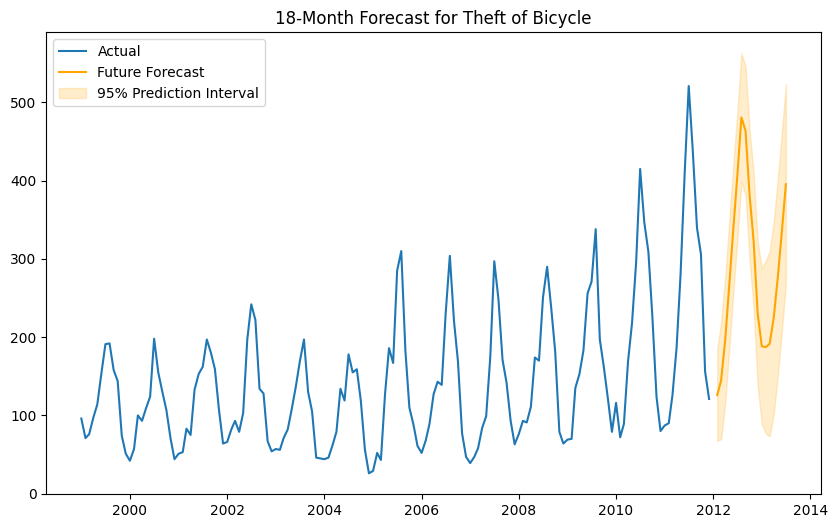

               TYPE  YEAR  MONTH  count       DATE
0  Theft of Vehicle  1999      1    640 1999-01-01
1  Theft of Vehicle  1999      2    528 1999-02-01
2  Theft of Vehicle  1999      3    569 1999-03-01
3  Theft of Vehicle  1999      4    476 1999-04-01
4  Theft of Vehicle  1999      5    541 1999-05-01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1588.430, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1566.227, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1551.794, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1587.416, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1550.525, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1551.575, Time=0.26 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1549.758, Time=0.72 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1551.235, Time=1.39 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1552.235, 

/tmp/ipykernel_36/2265858746.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=18, freq='M')


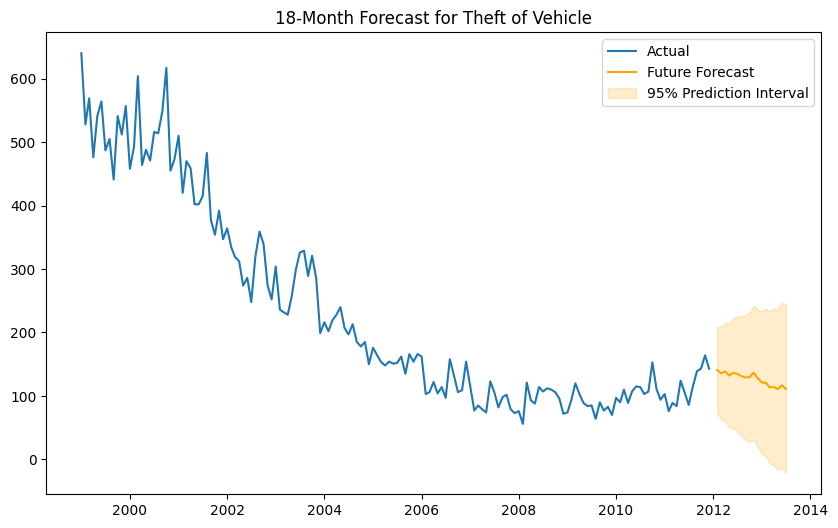

                                                TYPE  YEAR  MONTH  count  \
0  Vehicle Collision or Pedestrian Struck (with I...  1999      1    139   
1  Vehicle Collision or Pedestrian Struck (with I...  1999      2    103   
2  Vehicle Collision or Pedestrian Struck (with I...  1999      3    127   
3  Vehicle Collision or Pedestrian Struck (with I...  1999      4    141   
4  Vehicle Collision or Pedestrian Struck (with I...  1999      5    158   

        DATE  
0 1999-01-01  
1 1999-02-01  
2 1999-03-01  
3 1999-04-01  
4 1999-05-01  
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1349.821, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1395.620, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1363.819, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1353.098, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1393.622, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1354.446, Time=0.62 sec
 ARIMA(2

/tmp/ipykernel_36/2265858746.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=18, freq='M')


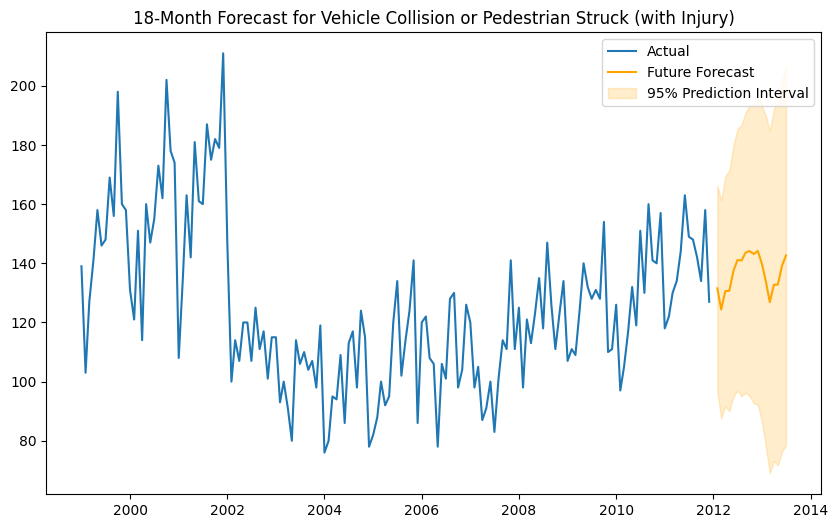

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

df = train_grp.copy()
bb=[]
cc=[]
dd=[]
# Combine YEAR and MONTH into a single datetime column for better plotting
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Plot each type separately
for name in df.TYPE.unique():
    dd.append(name)
    tr = df[df.TYPE == name]
    tr = tr.reset_index(drop=True)
    print(tr.head())
    
    # Use the full dataset for training
    full_data = tr['count'].values
    
    # Fit AutoARIMA model on the full dataset
    arima_model = auto_arima(full_data, seasonal=True, m=12, trace=True)
    print("Model fitted")
    
    # Forecast for the next 18 months
    forecast = arima_model.predict(n_periods=18)
    bb.append(forecast)
    # Optionally, add prediction intervals (confidence intervals)
    conf_int = arima_model.predict(n_periods=18, return_conf_int=True)[1]

    # Create a date range for the future predictions
    future_dates = pd.date_range(start=tr['DATE'].iloc[-1] + pd.DateOffset(months=1), periods=18, freq='M')
    cc.append(future_dates)
    # Plotting the actual time series
    plt.figure(figsize=(10, 6))
    plt.plot(tr['DATE'], tr['count'], label='Actual')
    
    # Plotting the forecasted values for future period
    plt.plot(future_dates, forecast, label='Future Forecast', color='orange')
    
    # Plotting the prediction intervals
    plt.fill_between(future_dates, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='95% Prediction Interval')
    
    plt.legend(["Actual", "Future Forecast", "95% Prediction Interval"])
    plt.title(f'18-Month Forecast for {name}')
    plt.show()


In [31]:
cc[-1]

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30'],
              dtype='datetime64[ns]', freq='ME')

In [34]:
bb

[array([212.70449728, 209.20574361, 208.34944094, 208.13986509,
        208.08857243, 208.07601881, 208.07294637, 208.07219441,
        208.07201037, 208.07196533, 208.0719543 , 208.0719516 ,
        208.07195094, 208.07195078, 208.07195074, 208.07195073,
        208.07195073, 208.07195073]),
 array([327.7278719 , 256.84573343, 264.42562793, 258.98924232,
        266.08137528, 263.20840328, 266.07466522, 269.9891035 ,
        275.63578626, 291.37854822, 293.7089624 , 297.09437126,
        292.96999463, 239.13920877, 251.67790214, 248.17431387,
        255.67739209, 253.09608212]),
 array([340.52869486, 335.34797155, 336.42524739, 335.38591022,
        334.34657305, 333.30723588, 332.26789871, 331.22856155,
        330.18922438, 329.14988721, 328.11055004, 327.07121287,
        326.0318757 , 324.99253853, 323.95320136, 322.9138642 ,
        321.87452703, 320.83518986]),
 array([279.88984372, 240.82877635, 270.27423357, 255.25836094,
        292.82461601, 284.84984242, 288.89900164, 291.

In [37]:
test

YEAR  MONTH                                               TYPE  \
0    2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1    2013      6                                   Theft of Vehicle   
2    2013      6                                   Theft of Bicycle   
3    2013      6                                 Theft from Vehicle   
4    2013      6                                        Other Theft   
..    ...    ...                                                ...   
157  2012      1                                        Other Theft   
158  2012      1                           Offence Against a Person   
159  2012      1                                           Mischief   
160  2012      1                  Break and Enter Residential/Other   
161  2012      1                         Break and Enter Commercial   

     Incident_Counts  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
..               ...  
157              NaN  
158              NaN  
159              NaN  
160              NaN  
161              NaN  

[162 rows x 4 columns]

In [39]:
flattened_list = [item for sublist in bb for item in sublist]

In [47]:
c_f = [item for sublist in cc for item in sublist]

In [49]:
pred['date'] = c_f

In [48]:
c_f

[Timestamp('2012-01-31 00:00:00'),
 Timestamp('2012-02-29 00:00:00'),
 Timestamp('2012-03-31 00:00:00'),
 Timestamp('2012-04-30 00:00:00'),
 Timestamp('2012-05-31 00:00:00'),
 Timestamp('2012-06-30 00:00:00'),
 Timestamp('2012-07-31 00:00:00'),
 Timestamp('2012-08-31 00:00:00'),
 Timestamp('2012-09-30 00:00:00'),
 Timestamp('2012-10-31 00:00:00'),
 Timestamp('2012-11-30 00:00:00'),
 Timestamp('2012-12-31 00:00:00'),
 Timestamp('2013-01-31 00:00:00'),
 Timestamp('2013-02-28 00:00:00'),
 Timestamp('2013-03-31 00:00:00'),
 Timestamp('2013-04-30 00:00:00'),
 Timestamp('2013-05-31 00:00:00'),
 Timestamp('2013-06-30 00:00:00'),
 Timestamp('2012-01-31 00:00:00'),
 Timestamp('2012-02-29 00:00:00'),
 Timestamp('2012-03-31 00:00:00'),
 Timestamp('2012-04-30 00:00:00'),
 Timestamp('2012-05-31 00:00:00'),
 Timestamp('2012-06-30 00:00:00'),
 Timestamp('2012-07-31 00:00:00'),
 Timestamp('2012-08-31 00:00:00'),
 Timestamp('2012-09-30 00:00:00'),
 Timestamp('2012-10-31 00:00:00'),
 Timestamp('2012-11-

In [43]:
pred = test.copy()
pred['Incident_Counts'] = flattened_list

In [45]:
cc

[DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
                '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
                '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
                '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
                '2013-05-31', '2013-06-30'],
               dtype='datetime64[ns]', freq='ME'),
 DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
                '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
                '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
                '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
                '2013-05-31', '2013-06-30'],
               dtype='datetime64[ns]', freq='ME'),
 DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
                '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
                '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
                

In [52]:
dd

['Break and Enter Commercial',
 'Break and Enter Residential/Other',
 'Mischief',
 'Offence Against a Person',
 'Other Theft',
 'Theft from Vehicle',
 'Theft of Bicycle',
 'Theft of Vehicle',
 'Vehicle Collision or Pedestrian Struck (with Injury)']

In [56]:
my_list = [1, 2, 3, 4, 5]
repeated_list = [item for item in dd for _ in range(18)]
print(repeated_list)


['Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Commercial', 'Break and Enter Residential/Other', 'Break and Enter Residential/Other', 'Break and Enter Residential/Other', 'Break and Enter Residential/Other', 'Break and Enter Residential/Other', 'Break and Enter Residential/Other', 'Break and Enter Residential/Other', 'Break and Enter Residential/Other', 'Break and Enter Residential/Other', 'Break and Enter Residential/Other', 'Break and Enter Residential/Other', 'Break and Enter Residential/Other', 'Break and Ente

In [57]:
pred['name'] = repeated_list

In [64]:
pp=pred[['name','date','Incident_Counts']]
pp.columns=['TYPE','date','Incident_Counts']
pp['YEAR'] = pp['date'].dt.year
pp['MONTH'] = pp['date'].dt.month

/tmp/ipykernel_36/968831147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp['YEAR'] = pp['date'].dt.year
/tmp/ipykernel_36/968831147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp['MONTH'] = pp['date'].dt.month


In [65]:
pp

TYPE       date  \
0                           Break and Enter Commercial 2012-01-31   
1                           Break and Enter Commercial 2012-02-29   
2                           Break and Enter Commercial 2012-03-31   
3                           Break and Enter Commercial 2012-04-30   
4                           Break and Enter Commercial 2012-05-31   
..                                                 ...        ...   
157  Vehicle Collision or Pedestrian Struck (with I... 2013-02-28   
158  Vehicle Collision or Pedestrian Struck (with I... 2013-03-31   
159  Vehicle Collision or Pedestrian Struck (with I... 2013-04-30   
160  Vehicle Collision or Pedestrian Struck (with I... 2013-05-31   
161  Vehicle Collision or Pedestrian Struck (with I... 2013-06-30   

     Incident_Counts  YEAR  MONTH  
0         212.704497  2012      1  
1         209.205744  2012      2  
2         208.349441  2012      3  
3         208.139865  2012      4  
4         208.088572  2012      5  
..               ...   ...    ...  
157       126.858818  2013      2  
158       132.725545  2013      3  
159       132.827678  2013      4  
160       139.150678  2013      5  
161       142.661535  2013      6  

[162 rows x 5 columns]

In [62]:
sss = test.copy()

In [63]:
sss 

YEAR  MONTH                                               TYPE  \
0    2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1    2013      6                                   Theft of Vehicle   
2    2013      6                                   Theft of Bicycle   
3    2013      6                                 Theft from Vehicle   
4    2013      6                                        Other Theft   
..    ...    ...                                                ...   
157  2012      1                                        Other Theft   
158  2012      1                           Offence Against a Person   
159  2012      1                                           Mischief   
160  2012      1                  Break and Enter Residential/Other   
161  2012      1                         Break and Enter Commercial   

     Incident_Counts  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
..               ...  
157              NaN  
158              NaN  
159              NaN  
160              NaN  
161              NaN  

[162 rows x 4 columns]

In [66]:
sss = pd.merge(sss,pp,on=['TYPE','YEAR','MONTH'])

In [69]:
ss['Incident_Counts'] = sss['Incident_Counts_y']
ss.to_csv('crime_arima.csv',index=False)

In [67]:
sss

YEAR  MONTH                                               TYPE  \
0    2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1    2013      6                                   Theft of Vehicle   
2    2013      6                                   Theft of Bicycle   
3    2013      6                                 Theft from Vehicle   
4    2013      6                                        Other Theft   
..    ...    ...                                                ...   
157  2012      1                                        Other Theft   
158  2012      1                           Offence Against a Person   
159  2012      1                                           Mischief   
160  2012      1                  Break and Enter Residential/Other   
161  2012      1                         Break and Enter Commercial   

     Incident_Counts_x       date  Incident_Counts_y  
0                  NaN 2013-06-30         142.661535  
1                  NaN 2013-06-30         111.034810  
2                  NaN 2013-06-30         395.542669  
3                  NaN 2013-06-30        1011.804923  
4                  NaN 2013-06-30         411.417321  
..                 ...        ...                ...  
157                NaN 2012-01-31         404.087042  
158                NaN 2012-01-31         279.889844  
159                NaN 2012-01-31         340.528695  
160                NaN 2012-01-31         327.727872  
161                NaN 2012-01-31         212.704497  

[162 rows x 6 columns]

In [61]:
pp

name       date  \
0                           Break and Enter Commercial 2012-01-31   
1                           Break and Enter Commercial 2012-02-29   
2                           Break and Enter Commercial 2012-03-31   
3                           Break and Enter Commercial 2012-04-30   
4                           Break and Enter Commercial 2012-05-31   
..                                                 ...        ...   
157  Vehicle Collision or Pedestrian Struck (with I... 2013-02-28   
158  Vehicle Collision or Pedestrian Struck (with I... 2013-03-31   
159  Vehicle Collision or Pedestrian Struck (with I... 2013-04-30   
160  Vehicle Collision or Pedestrian Struck (with I... 2013-05-31   
161  Vehicle Collision or Pedestrian Struck (with I... 2013-06-30   

     Incident_Counts  YEAR  MONTH  
0         212.704497  2012      1  
1         209.205744  2012      2  
2         208.349441  2012      3  
3         208.139865  2012      4  
4         208.088572  2012      5  
..               ...   ...    ...  
157       126.858818  2013      2  
158       132.725545  2013      3  
159       132.827678  2013      4  
160       139.150678  2013      5  
161       142.661535  2013      6  

[162 rows x 5 columns]

In [58]:
pred

YEAR  MONTH                                               TYPE  \
0    2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1    2013      6                                   Theft of Vehicle   
2    2013      6                                   Theft of Bicycle   
3    2013      6                                 Theft from Vehicle   
4    2013      6                                        Other Theft   
..    ...    ...                                                ...   
157  2012      1                                        Other Theft   
158  2012      1                           Offence Against a Person   
159  2012      1                                           Mischief   
160  2012      1                  Break and Enter Residential/Other   
161  2012      1                         Break and Enter Commercial   

     Incident_Counts       date  \
0         212.704497 2012-01-31   
1         209.205744 2012-02-29   
2         208.349441 2012-03-31   
3         208.139865 2012-04-30   
4         208.088572 2012-05-31   
..               ...        ...   
157       126.858818 2013-02-28   
158       132.725545 2013-03-31   
159       132.827678 2013-04-30   
160       139.150678 2013-05-31   
161       142.661535 2013-06-30   

                                                  name  
0                           Break and Enter Commercial  
1                           Break and Enter Commercial  
2                           Break and Enter Commercial  
3                           Break and Enter Commercial  
4                           Break and Enter Commercial  
..                                                 ...  
157  Vehicle Collision or Pedestrian Struck (with I...  
158  Vehicle Collision or Pedestrian Struck (with I...  
159  Vehicle Collision or Pedestrian Struck (with I...  
160  Vehicle Collision or Pedestrian Struck (with I...  
161  Vehicle Collision or Pedestrian Struck (with I...  

[162 rows x 6 columns]

In [54]:
dd_r = dd*18

In [55]:
dd_r

['Break and Enter Commercial',
 'Break and Enter Residential/Other',
 'Mischief',
 'Offence Against a Person',
 'Other Theft',
 'Theft from Vehicle',
 'Theft of Bicycle',
 'Theft of Vehicle',
 'Vehicle Collision or Pedestrian Struck (with Injury)',
 'Break and Enter Commercial',
 'Break and Enter Residential/Other',
 'Mischief',
 'Offence Against a Person',
 'Other Theft',
 'Theft from Vehicle',
 'Theft of Bicycle',
 'Theft of Vehicle',
 'Vehicle Collision or Pedestrian Struck (with Injury)',
 'Break and Enter Commercial',
 'Break and Enter Residential/Other',
 'Mischief',
 'Offence Against a Person',
 'Other Theft',
 'Theft from Vehicle',
 'Theft of Bicycle',
 'Theft of Vehicle',
 'Vehicle Collision or Pedestrian Struck (with Injury)',
 'Break and Enter Commercial',
 'Break and Enter Residential/Other',
 'Mischief',
 'Offence Against a Person',
 'Other Theft',
 'Theft from Vehicle',
 'Theft of Bicycle',
 'Theft of Vehicle',
 'Vehicle Collision or Pedestrian Struck (with Injury)',
 'Br

In [53]:
162/9

18.0

In [50]:
pred

YEAR  MONTH                                               TYPE  \
0    2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1    2013      6                                   Theft of Vehicle   
2    2013      6                                   Theft of Bicycle   
3    2013      6                                 Theft from Vehicle   
4    2013      6                                        Other Theft   
..    ...    ...                                                ...   
157  2012      1                                        Other Theft   
158  2012      1                           Offence Against a Person   
159  2012      1                                           Mischief   
160  2012      1                  Break and Enter Residential/Other   
161  2012      1                         Break and Enter Commercial   

     Incident_Counts       date  
0         212.704497 2012-01-31  
1         209.205744 2012-02-29  
2         208.349441 2012-03-31  
3         208.139865 2012-04-30  
4         208.088572 2012-05-31  
..               ...        ...  
157       126.858818 2013-02-28  
158       132.725545 2013-03-31  
159       132.827678 2013-04-30  
160       139.150678 2013-05-31  
161       142.661535 2013-06-30  

[162 rows x 5 columns]

In [ ]:
for i in bb:
    l = i[-1]
    
        

In [35]:
dd

['Break and Enter Commercial',
 'Break and Enter Residential/Other',
 'Mischief',
 'Offence Against a Person',
 'Other Theft',
 'Theft from Vehicle',
 'Theft of Bicycle',
 'Theft of Vehicle',
 'Vehicle Collision or Pedestrian Struck (with Injury)']

In [36]:
ss

Incident_Counts
0                  0
1                  0
2                  0
3                  0
4                  0
..               ...
157                0
158                0
159                0
160                0
161                0

[162 rows x 1 columns]

In [38]:
bb

[array([212.70449728, 209.20574361, 208.34944094, 208.13986509,
        208.08857243, 208.07601881, 208.07294637, 208.07219441,
        208.07201037, 208.07196533, 208.0719543 , 208.0719516 ,
        208.07195094, 208.07195078, 208.07195074, 208.07195073,
        208.07195073, 208.07195073]),
 array([327.7278719 , 256.84573343, 264.42562793, 258.98924232,
        266.08137528, 263.20840328, 266.07466522, 269.9891035 ,
        275.63578626, 291.37854822, 293.7089624 , 297.09437126,
        292.96999463, 239.13920877, 251.67790214, 248.17431387,
        255.67739209, 253.09608212]),
 array([340.52869486, 335.34797155, 336.42524739, 335.38591022,
        334.34657305, 333.30723588, 332.26789871, 331.22856155,
        330.18922438, 329.14988721, 328.11055004, 327.07121287,
        326.0318757 , 324.99253853, 323.95320136, 322.9138642 ,
        321.87452703, 320.83518986]),
 array([279.88984372, 240.82877635, 270.27423357, 255.25836094,
        292.82461601, 284.84984242, 288.89900164, 291.

In [ ]:
my_list = [1, 2, 3, 4, 5]
my_list.reverse()
print(my_list)

In [33]:
test[test.YEAR==2013]

YEAR  MONTH                                               TYPE  \
0   2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1   2013      6                                   Theft of Vehicle   
2   2013      6                                   Theft of Bicycle   
3   2013      6                                 Theft from Vehicle   
4   2013      6                                        Other Theft   
5   2013      6                           Offence Against a Person   
6   2013      6                                           Mischief   
7   2013      6                  Break and Enter Residential/Other   
8   2013      6                         Break and Enter Commercial   
9   2013      5  Vehicle Collision or Pedestrian Struck (with I...   
10  2013      5                                   Theft of Vehicle   
11  2013      5                                   Theft of Bicycle   
12  2013      5                                 Theft from Vehicle   
13  2013      5                                        Other Theft   
14  2013      5                           Offence Against a Person   
15  2013      5                                           Mischief   
16  2013      5                  Break and Enter Residential/Other   
17  2013      5                         Break and Enter Commercial   
18  2013      4  Vehicle Collision or Pedestrian Struck (with I...   
19  2013      4                                   Theft of Vehicle   
20  2013      4                                   Theft of Bicycle   
21  2013      4                                 Theft from Vehicle   
22  2013      4                                        Other Theft   
23  2013      4                           Offence Against a Person   
24  2013      4                                           Mischief   
25  2013      4                  Break and Enter Residential/Other   
26  2013      4                         Break and Enter Commercial   
27  2013      3  Vehicle Collision or Pedestrian Struck (with I...   
28  2013      3                                   Theft of Vehicle   
29  2013      3                                   Theft of Bicycle   
30  2013      3                                 Theft from Vehicle   
31  2013      3                                        Other Theft   
32  2013      3                           Offence Against a Person   
33  2013      3                                           Mischief   
34  2013      3                  Break and Enter Residential/Other   
35  2013      3                         Break and Enter Commercial   
36  2013      2  Vehicle Collision or Pedestrian Struck (with I...   
37  2013      2                                   Theft of Vehicle   
38  2013      2                                   Theft of Bicycle   
39  2013      2                                 Theft from Vehicle   
40  2013      2                                        Other Theft   
41  2013      2                           Offence Against a Person   
42  2013      2                                           Mischief   
43  2013      2                  Break and Enter Residential/Other   
44  2013      2                         Break and Enter Commercial   
45  2013      1  Vehicle Collision or Pedestrian Struck (with I...   
46  2013      1                                   Theft of Vehicle   
47  2013      1                                   Theft of Bicycle   
48  2013      1                                 Theft from Vehicle   
49  2013      1                                        Other Theft   
50  2013      1                           Offence Against a Person   
51  2013      1                                           Mischief   
52  2013      1                  Break and Enter Residential/Other   
53  2013      1                         Break and Enter Commercial   

    Incident_Counts  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
5               NaN  

In [ ]:
from gluonts.model.r_forecast import RForecastPredictor

# Define the ARIMA model using RForecastPredictor
arima_predictor = RForecastPredictor(
    freq="M",
    prediction_length=18,  # Forecast 12 months ahead
    method_name="arima"  # Use the ARIMA model
)

In [ ]:
train_ds = ListDataset(
    [{"start": df['date'].iloc[0], "target": df['value'].values}],
    freq="M"
)